In [1]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime



In [2]:
print(sklearn.__version__)

0.24.1


In [3]:
print(np.__version__)

1.20.1


In [4]:
print(pd.__version__)

1.2.4


In [5]:
'''
This is a dataset that contains a number of different automobile features, which we use to predict how many 
miles that automobile runs per gallon of fuel.
'''
automobile_df=pd.read_csv('data/auto-mpg.csv')


In [6]:
'''
 If you want to view a sample of records in your data frame so that you can explore the dataset, 
 you can call the df.sample function. The parameter 5 indicates that five records should be displayed. 
 And here are five records chosen at random from our dataset.
'''
automobile_df.sample(5)

mpg  cylinders  displacement horsepower  weight  acceleration  \
247  39.4          4          85.0         70    2070          18.6   
74   13.0          8         302.0        140    4294          16.0   
233  29.0          4          97.0         78    1940          14.5   
327  36.4          5         121.0         67    2950          19.9   
129  31.0          4          79.0         67    1950          19.0   

     model year  origin                  car name  
247          78       3            datsun b210 gx  
74           72       1     ford gran torino (sw)  
233          77       2  volkswagen rabbit custom  
327          80       2       audi 5000s (diesel)  
129          74       3               datsun b210

In [7]:
'''
The columns at the very right make up the features of our machine learning model. 

The regression models that we're going to build will use these columns in order to make predictions 
about the miles per gallon for that car. 

There are features such as the number of cylinders the car has, the displacement of the car from the bottom, 
the horsepower, the weight, the acceleration, model, year, the origin of the car, and the name of the car. 

The first column off to the left, the mpg column, gives us the miles per gallon for that particular car, 
and this is what we'll try and predict using regression. 
'''
automobile_df.sample(5)

mpg  cylinders  displacement horsepower  weight  acceleration  \
131  32.0          4          71.0         65    1836          21.0   
121  15.0          8         318.0        150    3399          11.0   
318  29.8          4         134.0         90    2711          15.5   
204  32.0          4          85.0         70    1990          17.0   
238  33.5          4          98.0         83    2075          15.9   

     model year  origin                car name  
131          74       3     toyota corolla 1200  
121          73       1       dodge dart custom  
318          80       3  toyota corona liftback  
204          76       3            datsun b-210  
238          77       1          dodge colt m/m

In [8]:
'''

The shape variable for any dataset gives us how many records are in the dataset and how many columns. 
So we have 398 records and 9 columns of data. 


These 9 columns include 8 columns of features and 1 column that forms our machine learning target, 
the value we are trying to predict, the mpg. 
'''
automobile_df.shape

(398, 9)

In [9]:
'''

Now, datasets that we work with in the real world often contain missing fields or values, and these records need to be handled and cleaned in some way. 
This is part of the data wrangling or preprocessing that will apply to our data.


Now this particular dataset contains question marks(?) in place of missing fields; 
we'll replace all of those question marks with NaNs, or not a numbers. 
Call the automobile_df.replace function in order to perform this replacement.
'''

automobile_df=automobile_df.replace("?",np.nan)

In [10]:
'''

And once you have NaNs in place of missing values, it's very easy to clean your data frame. 
The drop any function on your pandas DataFrame will simply drop all of those records which have any fields missing.
'''

automobile_df=automobile_df.dropna()

In [11]:
'''
And if you take a look at the shape of your data frame now, you see that we have 392 records. 
We originally had 398 records, and now it's 392. 
6 records had missing fields, they were dropped.
'''
automobile_df.shape

(392, 9)

In [12]:
'''
While we are building up the features for our linear regression model, 
it's pretty clear that the origin of the car and the name of the car has no impact on its mileage. 
This is something that we can determine just by a cursory look at the columns in our data frame, 
so go ahead and drop the origin and car name columns in place. 

These features, we know by using our common sense and logic, have no predictive powers.
'''
automobile_df.drop(['origin','car name'],axis=1,inplace=True)

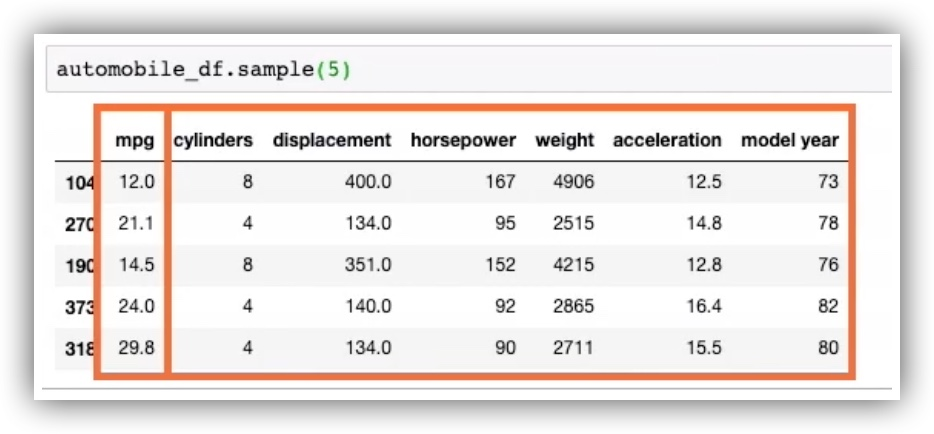

In [13]:
'''

  I'm going to call automobile_df.sample to sample five records from our data frames. 
  And here are the features that we're going to work with: cylinders, displacement, horsepower, weight, 
  acceleration, and model year, and the miles per gallon is our target, what you're going to try and predict.
'''
automobile_df.sample(5)
from IPython.display import Image
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-16_01-21-45.jpg')

In [14]:
'''

 Now this dataset is from the '90s, and you can see that all of the model years are basically 1973, 78, 82, and so on.
 Now the model year by itself is just an object. Let's make this useful by converting this to be the age of the car.
 
 It's quite possible that we don't know for sure that the age of the car might have some impact on its mileage. 
 Before we get to the age, let's convert the year to its full form, 1973, 1980, and so on, 
 
 so I'm going to prepend the string 19 to the model year. So 19 + model year as string, 
 will give us the resultant model year. 
 
 Assign this new format to the model year column and let's sample our data frame and take a look at the result.
 The model year now has the full year, 1982, 1972, and so on. 
'''
automobile_df['model year'] = '19' + automobile_df['model year'].astype(str)

In [15]:
'''

 Assign this new format to the model year column and let's sample our data frame and take a look at the result.
 The model year now has the full year, 1982, 1972, and so on. 
 
 
 Now with this, we can calculate how old this particular car is.
'''
automobile_df.sample(5)

mpg  cylinders  displacement horsepower  weight  acceleration model year
108  20.0          4          97.0         88    2279          19.0       1973
222  17.0          8         260.0        110    4060          19.0       1977
329  44.6          4          91.0         67    1850          13.8       1980
129  31.0          4          79.0         67    1950          19.0       1974
191  22.0          6         225.0        100    3233          15.4       1976

In [16]:
'''
 You can choose any reference date to calculate the age, as long as it's later than the last year that the 
 car was made. 
 
 In order to keep things simple, we'll calculate each field by subtracting from the current year.
 
 I'll use the datetime library to access the current year we're at; this year will be in numeric form.
 
 And I'll convert the data in the model year column to numeric form by calling pd.to_numeric.
 
 The result will be a number that will represent the age of a particular car.

'''

automobile_df['age']=datetime.datetime.now().year-pd.to_numeric(automobile_df['model year'])

In [17]:
'''
 Go ahead and drop the original model year field, we no longer needed because we have the age column.
'''
automobile_df.drop(['model year'], axis=1, inplace=True)

In [18]:
'''
 Let's view a sample of this data frame. 
 Once again, you can see we now have each column which tells you how old this particular car is. 
 
 The absolute values for these ages don't really matter so much. 
 It is their relative values that are more significant. 
 If a car is older than another, it's possible that its mileage goes down. 
'''

automobile_df.sample(5)

mpg  cylinders  displacement horsepower  weight  acceleration  age
252  19.2          6         231.0        105    3535          19.2   43
104  12.0          8         400.0        167    4906          12.5   48
72   15.0          8         304.0        150    3892          12.5   49
267  27.5          4         134.0         95    2560          14.2   43
8    14.0          8         455.0        225    4425          10.0   51

In [19]:
'''

If you're building and training a machine learning model, all of the inputs to your model need to be numeric.

Take a look at the data types of the different columns. 
You'll find that all of them are numeric except for one, that is the horsepower column. 

The horsepower is a numeric field, but its data type in our data frame is object. 
We need to fix this. This is very easily done using pandas.





'''
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [20]:
'''
Simply call pd.to_numeric to convert horsepower to a numeric field and assign it to the horsepower column once again.

'''
automobile_df['horsepower']=pd.to_numeric(automobile_df['horsepower'],errors='coerce')

In [21]:
'''
Let's now call describe on our dataset in order to get a few statistical bits of information about all of our 
numerical features. 

You can see that all of the features in our dataset are now numeric. 

We have mean value, standard deviations, and the different percentiles displayed here. 

The describe function in pandas is an easy way for you to get a quick feel for your numeric data.
'''

automobile_df.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration         age  
count    392.000000  392.000000  
mean      15.541327   45.020408  
std        2.758864    3.683737  
min        8.000000   39.000000  
25%       13.775000   42.000000  
50%       15.500000   45.000000  
75%       17.025000   48.000000  
max       24.800000   51.000000

Text(0, 0.5, 'Miles per gallon')

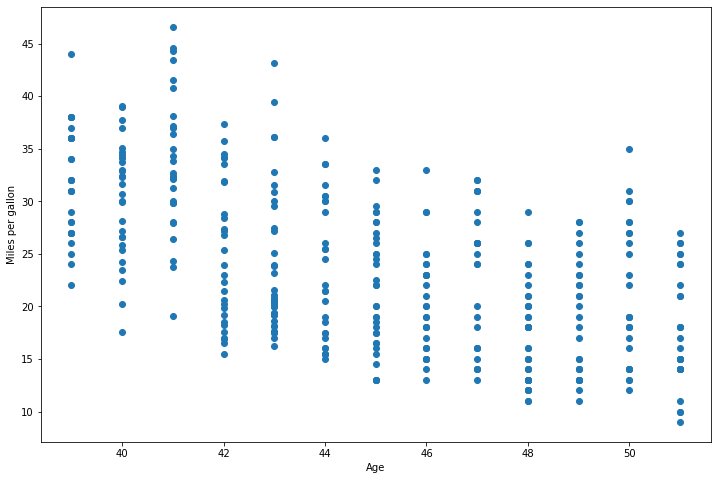

In [22]:
'''
Understanding the features of our dataset and what we're trying to predict is the first step. 
The next step is to explore the data using visualizations. 

I'm going to use Matplotlib to plot a few scatter plots in order to understand the 
pairwise relationships that exists in my data.


 here I'm going to plot age versus the automobile's miles per gallon. 
 We thought it might be possible that the older car is, the lower its mileage. 
 Let's see if that's true using our visualization.
'''

fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(automobile_df['age'],automobile_df['mpg'])
plt.xlabel('Age')
plt.ylabel('Miles per gallon')

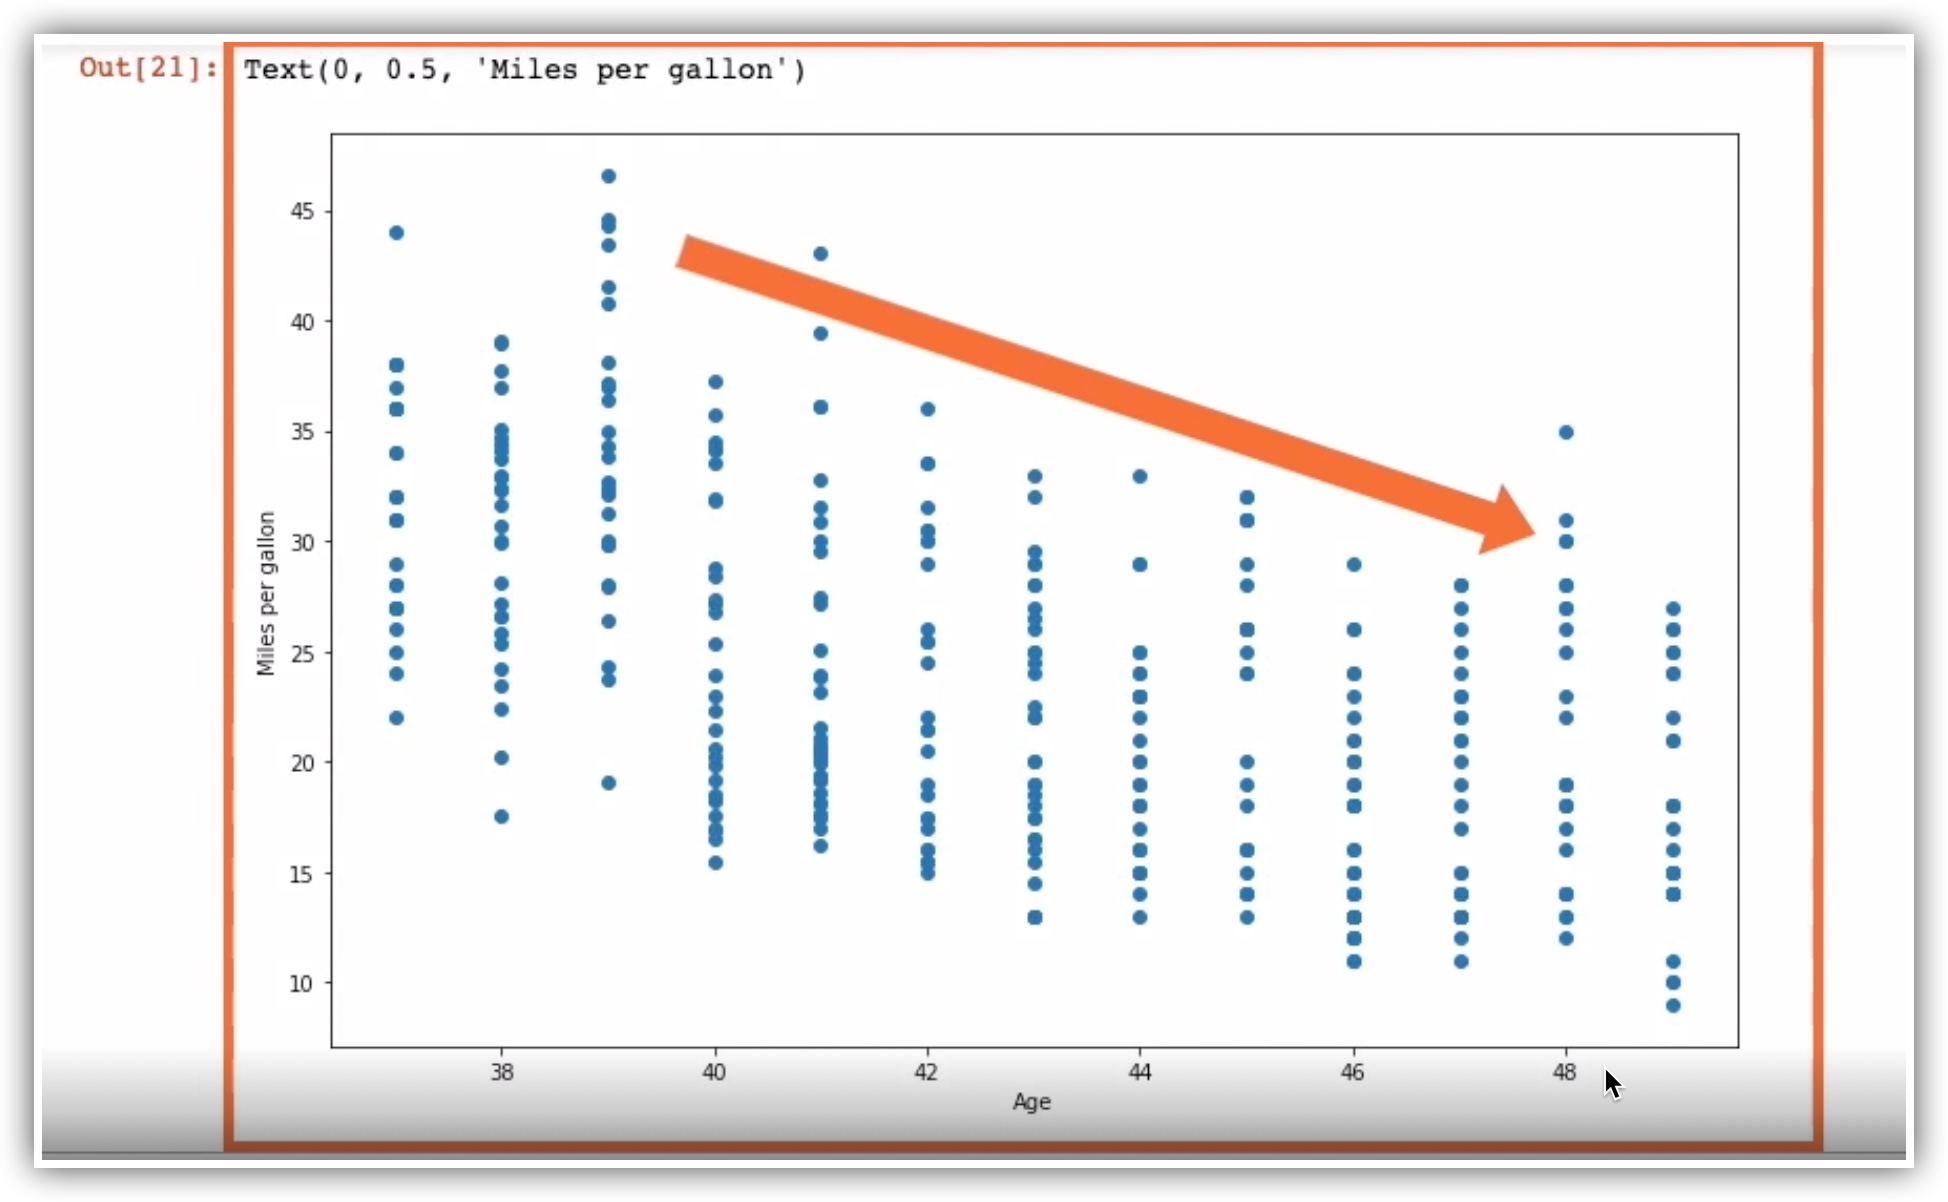

In [23]:
'''
And you can see that there is a definite downward trend here. 
Now this doesn't necessarily mean that a relationship does exist that needs more statistical analysis, 
but this visualization seems to tell us that older cars have lower mileage. 

'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-16_02-20-04.jpg')

Text(0, 0.5, 'Miles per gallon')

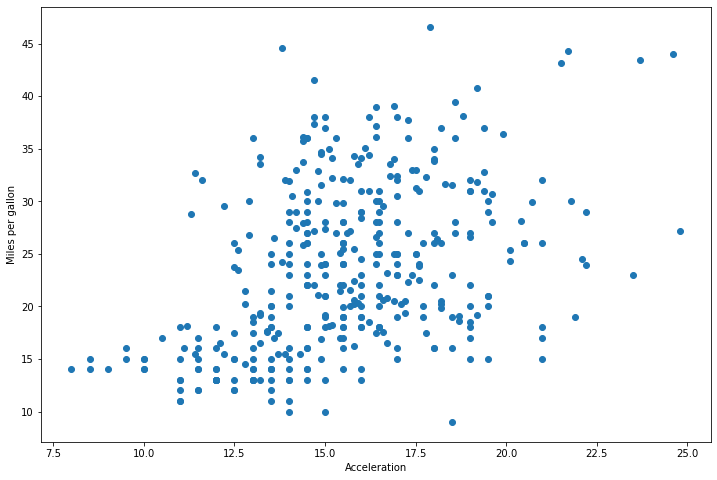

In [24]:
fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(automobile_df['acceleration'],automobile_df['mpg'])
plt.xlabel('Acceleration')
plt.ylabel('Miles per gallon')

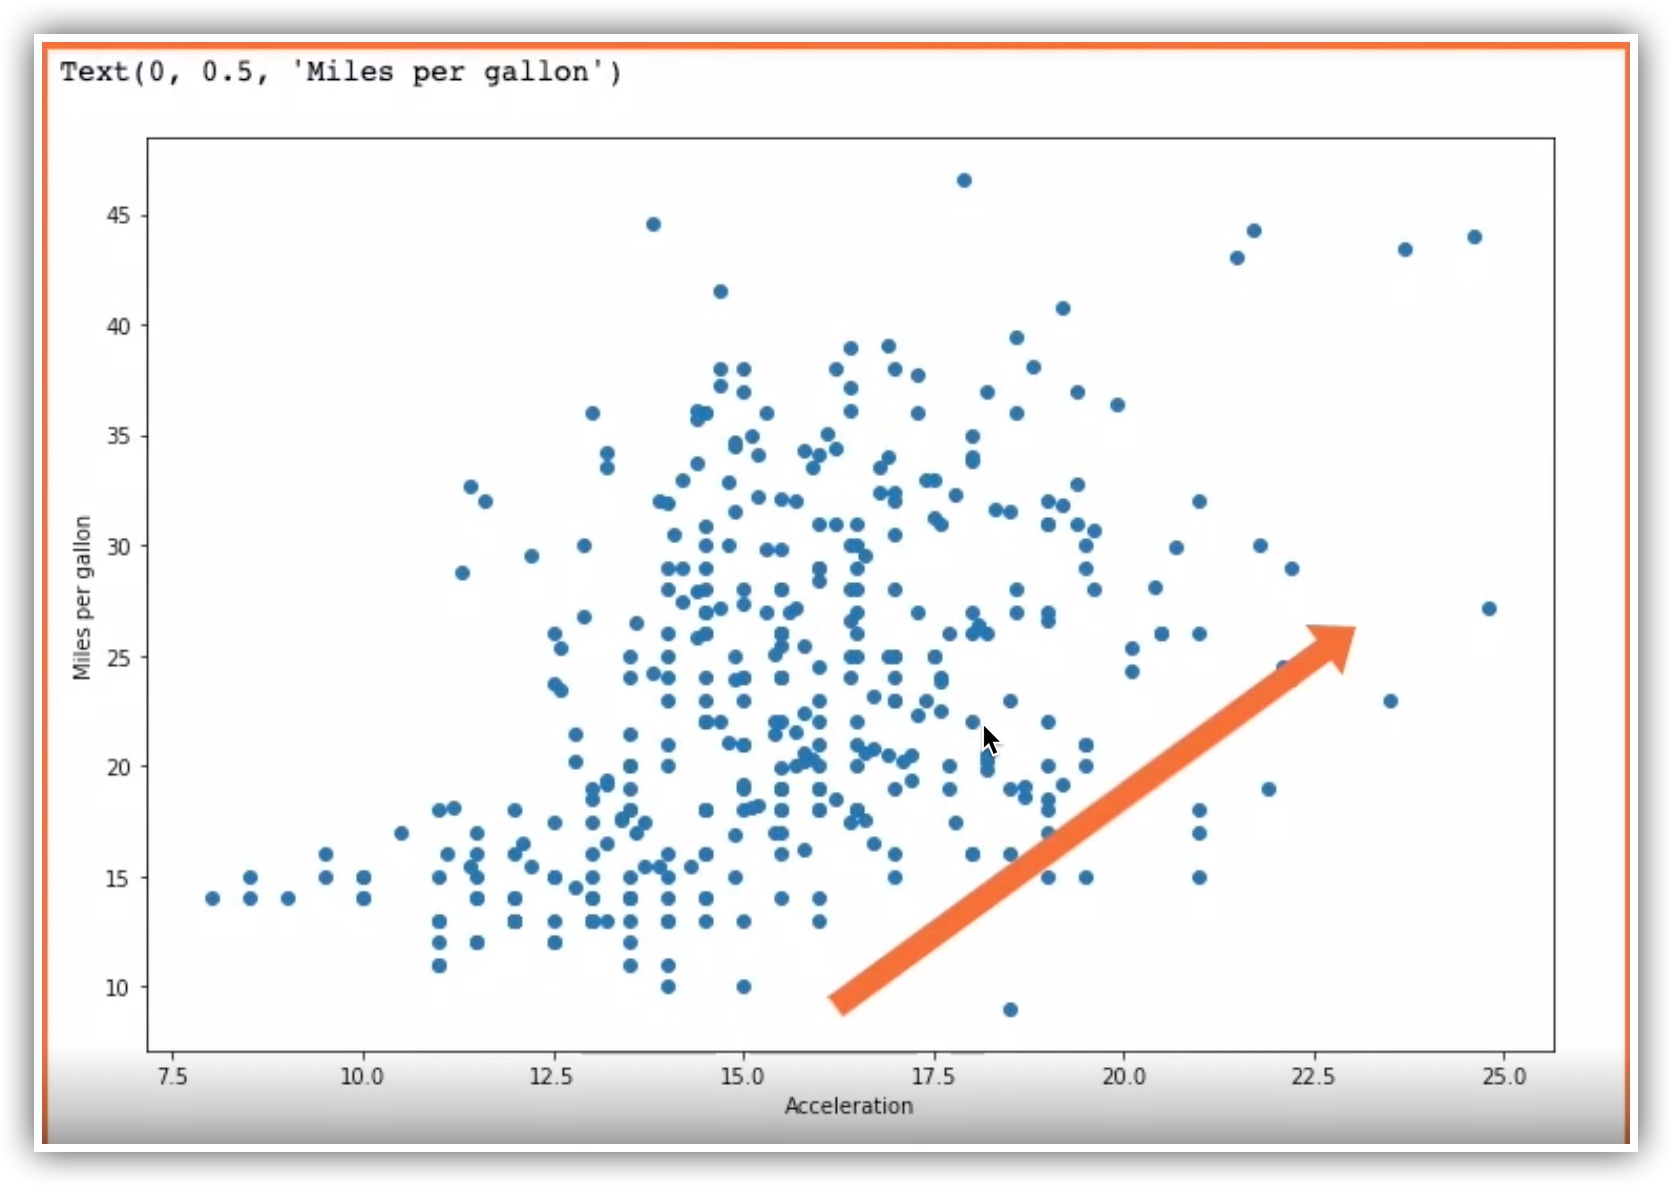

In [25]:
'''

Let's plot another scatter plot here. 
This time we'll try and see whether the acceleration of a particular car has any impact on mileage. 
Here is our resulting scatter plot, and you can see with acceleration on the x axis and miles per gallon 
on the y axis, there's a definite upward slope to the scatter plot. 

So maybe there is a relationship here.
'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-16_02-28-30.jpg')

Text(0, 0.5, 'Miles per gallon')

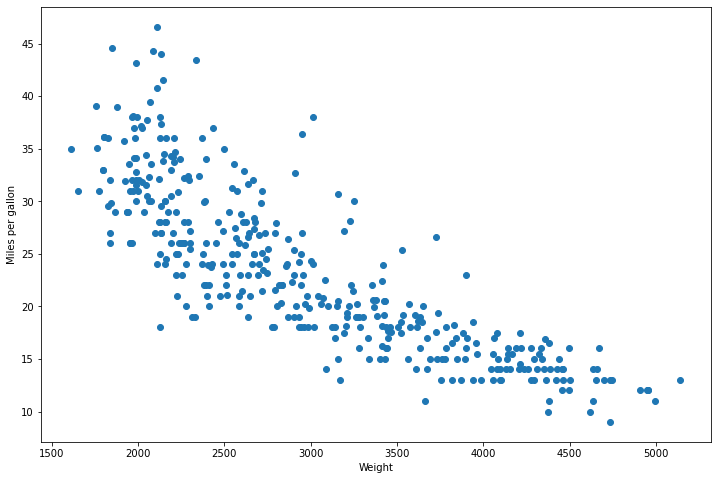

In [26]:
'''
I'm curious about another one of our input features, that is the weight of the car. 
Does the weight of the automobile have any significant impact on its mileage? 
Maybe this scatter plot will give us some information. 
And yes, definitely there is a downward trend here. 
It seems like greater the weight of the car, lower its mileage, which makes sense to us intuitively. 
'''
fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(automobile_df['weight'],automobile_df['mpg'])
plt.xlabel('Weight')
plt.ylabel('Miles per gallon')

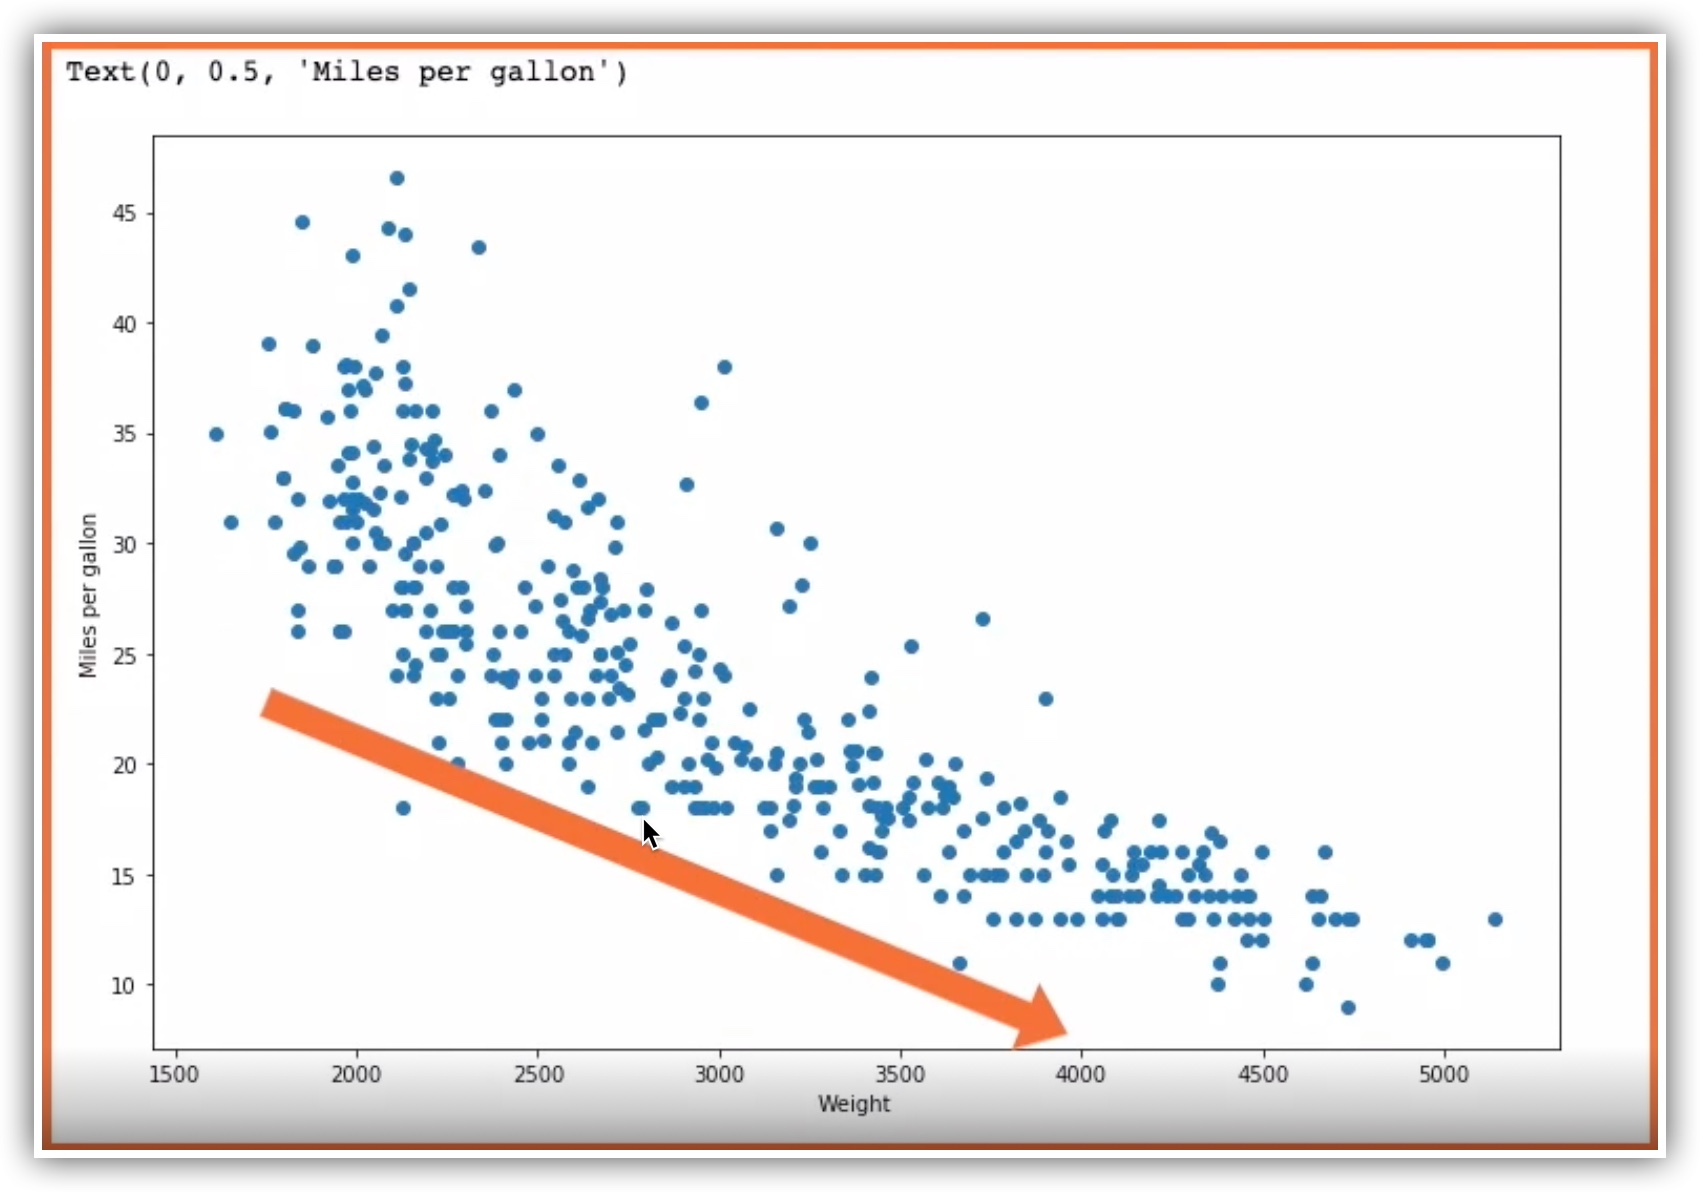

In [27]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-16_02-31-31.jpg')

Text(0, 0.5, 'Miles per gallon')

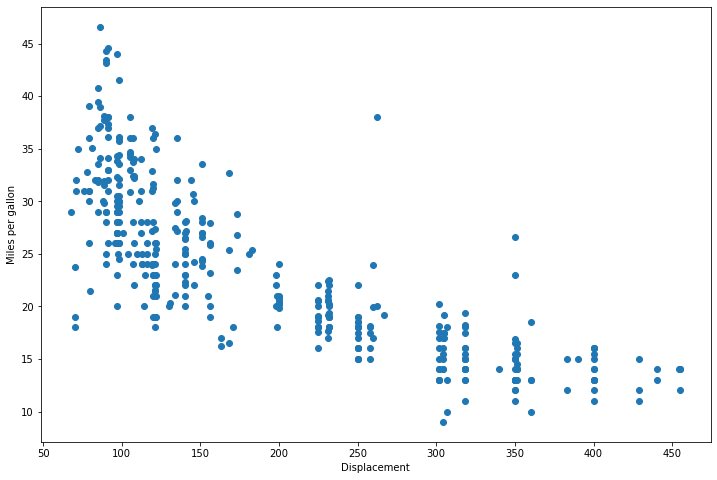

In [28]:
'''

What about how the car is positioned relative to the ground, the displacement of the car versus mileage, 
is there any relationship? 

And once again, the visualization seems to say yes. 
It seems like greater the displacement of the car off the ground, lower the miles per gallon it travels. 
'''
fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(automobile_df['displacement'],automobile_df['mpg'])
plt.xlabel('Displacement')
plt.ylabel('Miles per gallon')

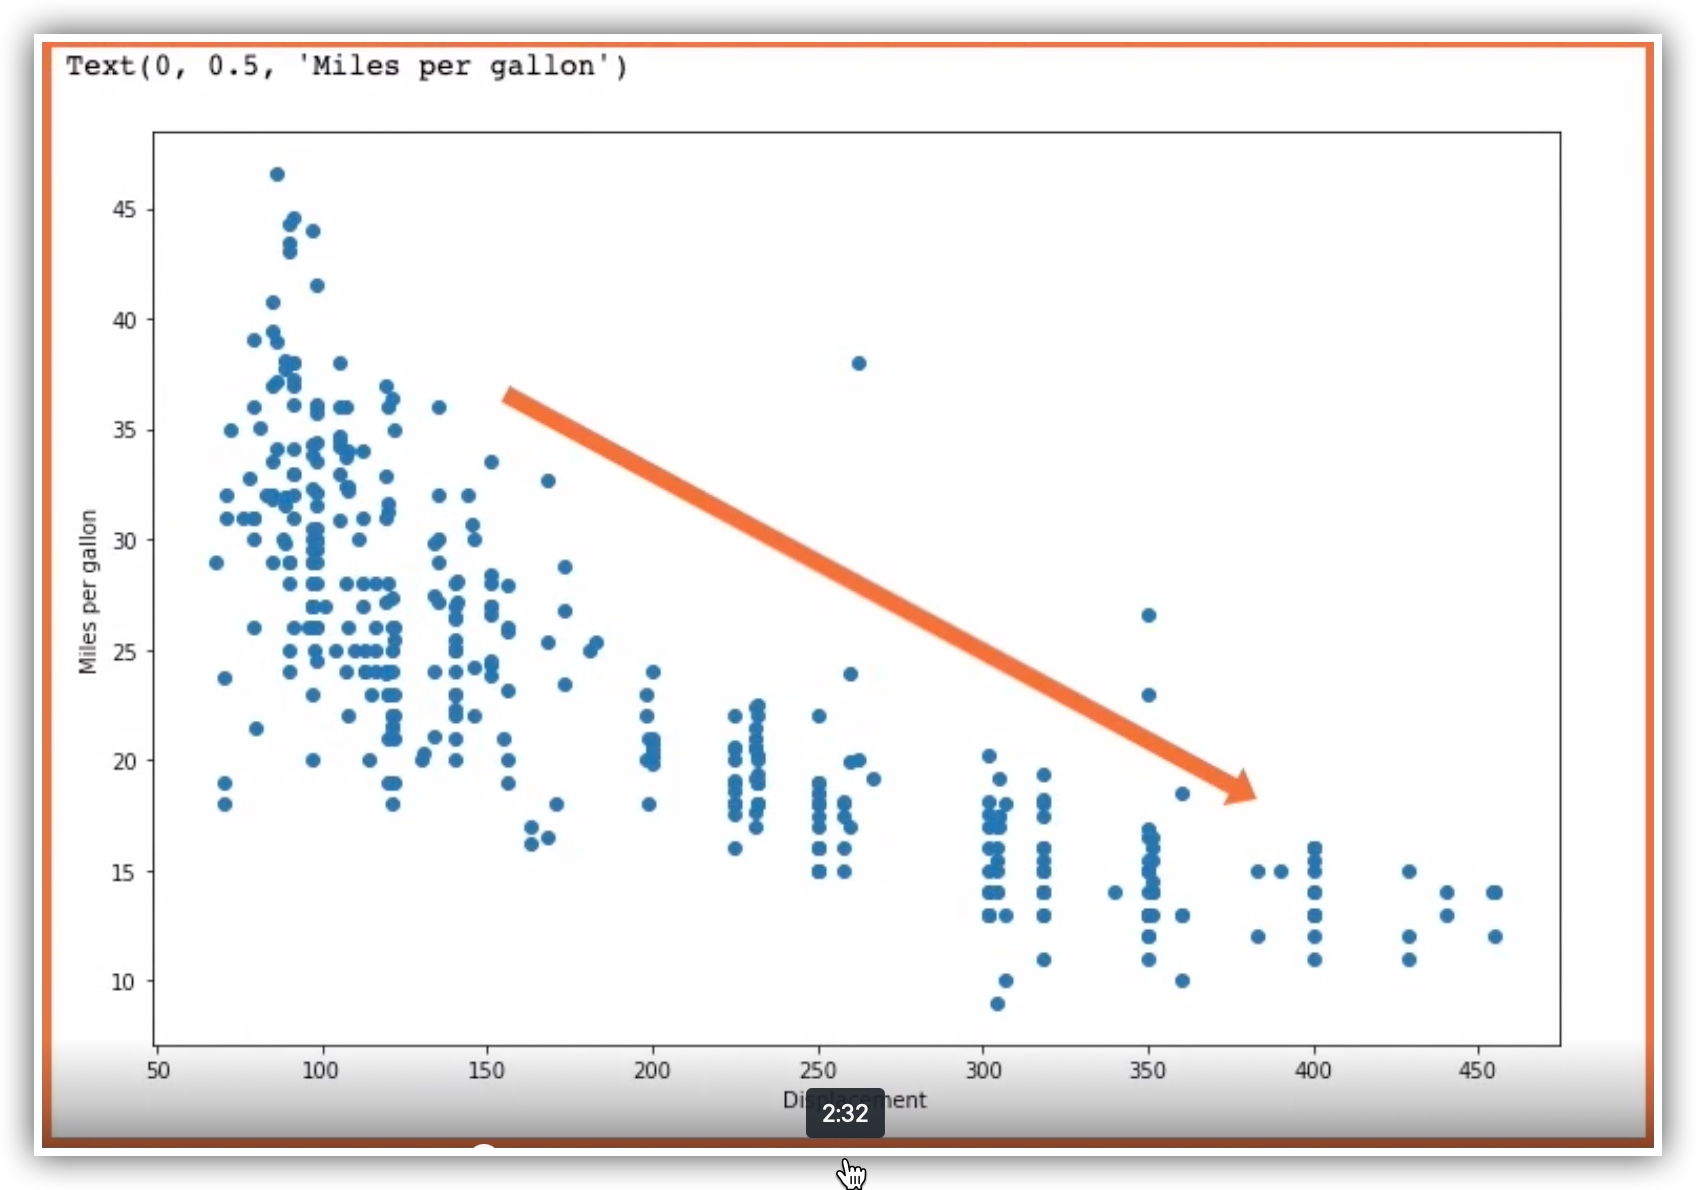

In [29]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-16_02-33-37.jpg')

Text(0, 0.5, 'Miles per gallon')

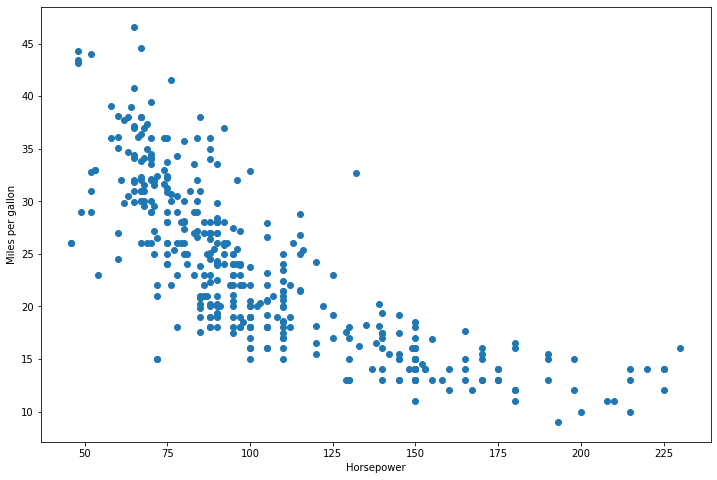

In [30]:
'''

This pairwise exploration of variables really helps us cement our understanding of the underlying dataset. 
What about horsepower, does it affect the miles per gallon? 
Yes, indeed, it does.
'''
fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(automobile_df['horsepower'],automobile_df['mpg'])
plt.xlabel('Horsepower')
plt.ylabel('Miles per gallon')

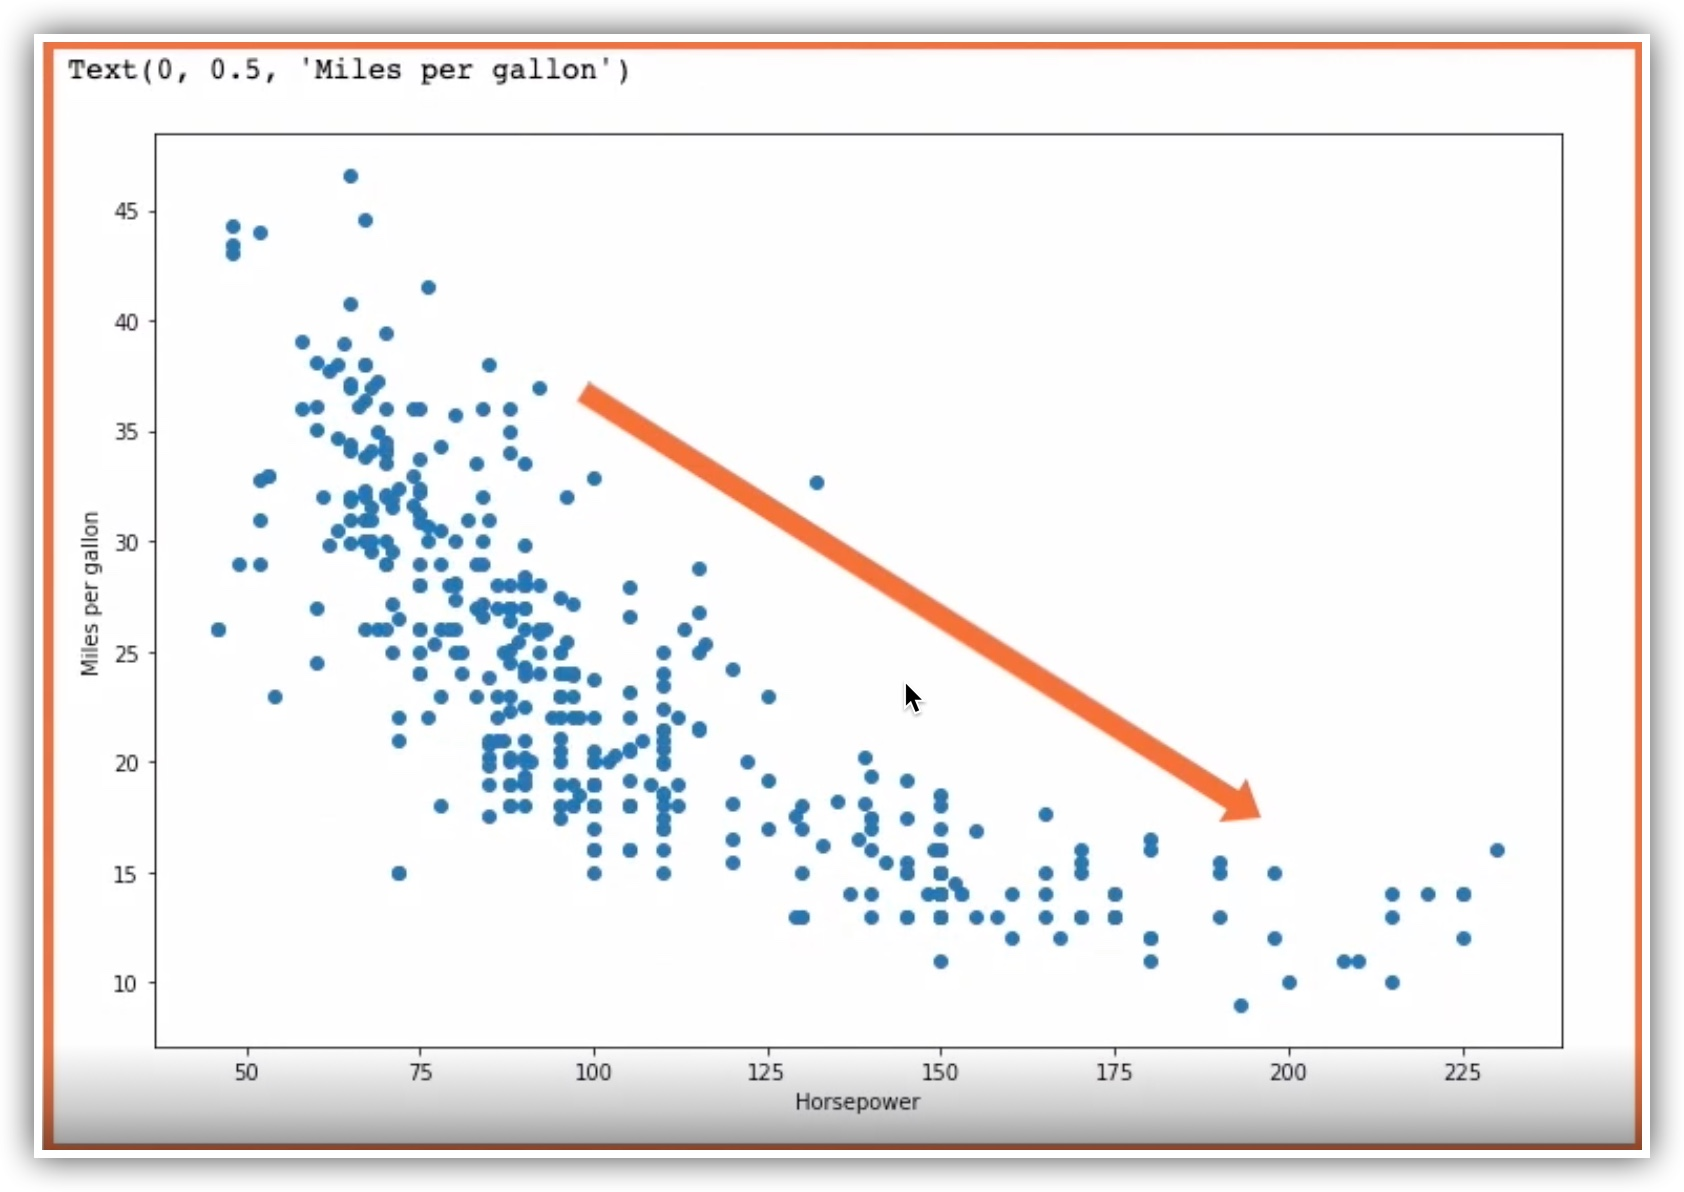

In [31]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-16_02-35-22.jpg')

Text(0, 0.5, 'Miles per gallon')

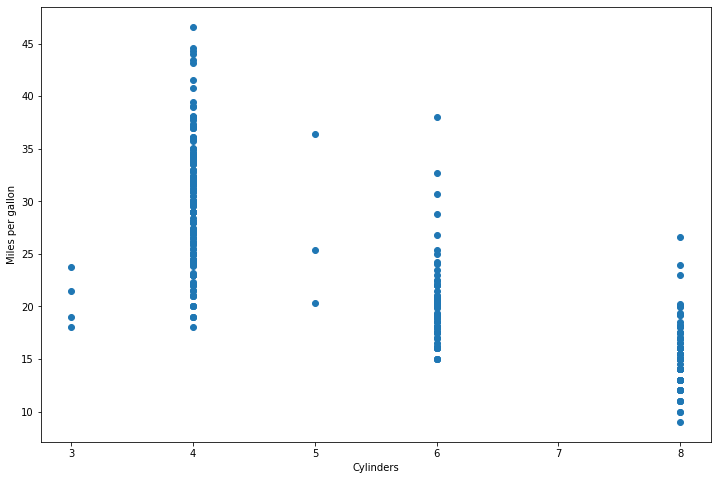

In [32]:
'''
Let's consider one last visualization here, cylinders versus mpg. 

And this scatter plot definitely seems to be a little harder to pass as compared with others. 
Cars with four cylinders overall seem to have the best miles per gallon.

When you train your machine learning model, you feed it features that you think are significant.
'''
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['cylinders'], automobile_df['mpg'])

plt.xlabel('Cylinders')
plt.ylabel('Miles per gallon')

In [33]:
'''
 Now it's quite possible that your features themselves have interrelationships or correlations with one another. 
 
 Correlations is a statistical measure that tells you whether and how strongly pairs of variables are related. 
 
 Data frames offer this nifty little core function that will list out pairwise correlations between every pair 
 of variables in your dataset. 
 
 Correlation values are floating point numbers between -1 and 1.
 
 1 implies a perfect positive correlation between two variables. 
 
 You can see here that every variable is perfectly positively correlated with itself. 
 
 Positive correlation implies that two variables move together in the same direction. 
 A negative correlation implies that the two variables move in different directions. 
 
 The raw correlation numbers tell us that acceleration is positively correlated with the mileage per gallon. 
 You can also see that weight is negatively correlated with miles per gallon. 
 
 In fact, weight is highly negatively correlated, - 0.83.
'''
automobile_corr=automobile_df.corr()
automobile_corr

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
age          -0.580541   0.345647      0.369855    0.416361  0.309120   

              acceleration       age  
mpg               0.423329 -0.580541  
cylinders        -0.504683  0.345647  
displacement     -0.543800  0.369855  
horsepower       -0.689196  0.416361  
weight           -0.416839  0.309120  
acceleration      1.000000 -0.290316  
age              -0.290316  1.000000

<AxesSubplot:>

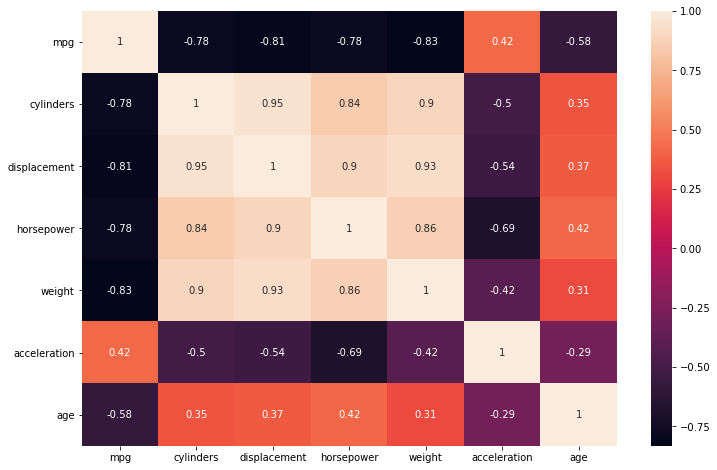

In [34]:
'''
 Viewing correlations with the raw numbers is hard, which is why we use a visualization technique 
 called the heatmap in order to view correlations in our data. 
 
 When we pass in annot is equal to True to the heatmap in Seaborn, it will print out the actual 
 correlation number along with the color-coded grid. 
 
 And this is what a heatmap looks like. Lighter colors tending towards cream denote positive correlation, 
 darker colors tending towards black denote negative correlation. 
 
 This value of - 0.58 is in the mpg row and the age column. 
 This shows that the miles per gallon seems very negatively correlated with the age of the car. 
'''
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(automobile_corr,annot=True)

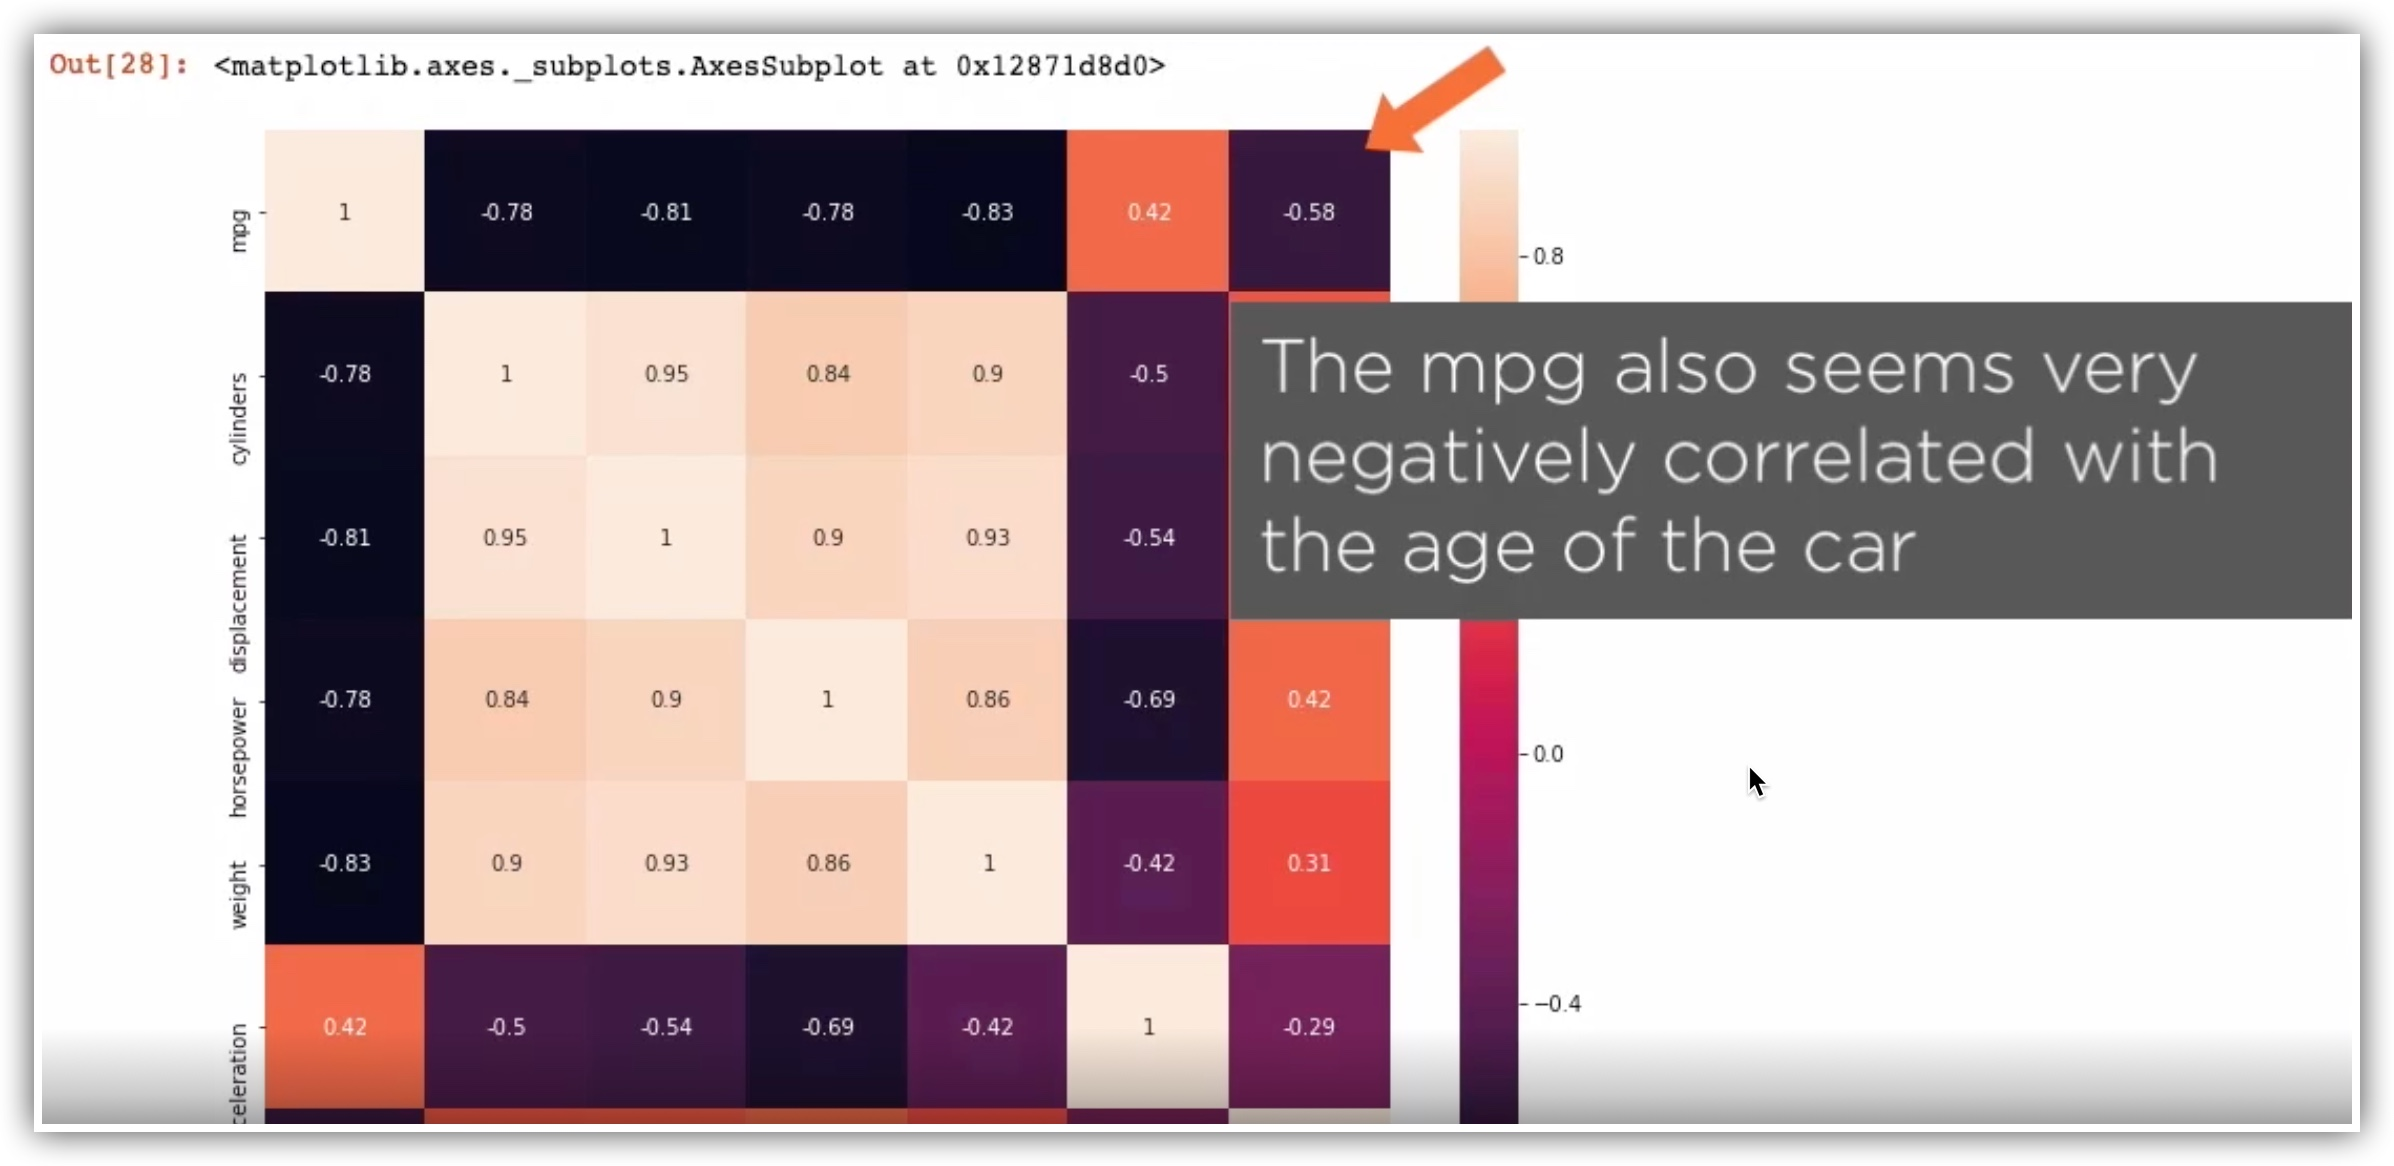

In [35]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-16_02-49-07.jpg')

In [36]:
'''

 We've done a bunch of preprocessing on our dataset, we've also viewed the relationships in our data. 
 
 Now let's take this updated data frame and shuffle it so that we feed and shuffle data to our 
 machine learning models. 
 
 I'll use the sample function on our data frame to shuffle my dataset, 
 I'm keeping all of the original samples, frac is equal to 1, and I'm resetting the indices. 
 
 Drop is equal to True, passed into reset_index will drop the original index values that existed in our data frame. 
 
 Here is our shuffled and cleaned up data frame. 
 
 Now, shuffling data before feeding into an ML model is important so that our model doesn't 
 inadvertently pick up patterns that do not exist. 
 

 so it's important that your data be shuffled. 
 
 model.
'''

automobile_df = automobile_df.sample(frac=1).reset_index(drop=True)

automobile_df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  age
0  19.0          4         121.0         112    2868          15.5   48
1  46.6          4          86.0          65    2110          17.9   41
2  25.0          4         140.0          75    2542          17.0   47
3  15.0          6         258.0         110    3730          19.0   46
4  31.0          4          91.0          68    1970          17.6   39

In [37]:
'''
I'm going to save my shuffled and cleaned up dataset to a new CSV file, auto-mpg- processed.csv. 
This is the CSV file that I'll use to build my regression models. 
'''
automobile_df.to_csv('data/auto-mpg-processed.csv', index=False)

In [38]:
'''
Here is what the dataset looks like. The features are cylinders, displacement, horsepower, weight, 
acceleration, and age, and we'll use these features in a linear regression model in order 
to predict the mileage of the car.
'''
automobile_df=pd.read_csv('data/auto-mpg-processed.csv')
automobile_df.sample(5)

mpg  cylinders  displacement  horsepower  weight  acceleration  age
114  18.0          3          70.0          90    2124          13.5   48
321  15.0          8         390.0         190    3850           8.5   51
16   32.9          4         119.0         100    2615          14.8   40
196  20.0          6         232.0         100    2914          16.0   46
79   13.0          8         400.0         190    4422          12.5   49

In [39]:
'''
When you are building and training a machine learning model, 
how do you know that the model that you've built is a good one? 

Well, you'll evaluate your model on test data. 
Test data are basically a holdout from your training dataset. 
These are instances your model hasn't seen before, and you'll see how well your model predicts 
using those instances. 

Scikit-learn offers a useful train_test_split function in order to split your data into training and test sets.
'''

from sklearn.model_selection import train_test_split


In [40]:
'''
 Let's first perform a linear regression using just one feature; 
 that is, we'll see how the horsepower of a particular car can be used to predict its mileage. 
 
 So your X variable is going to be just horsepower, and the Y variable is going to be MPG. 
 
 The Y variables are what we'll try and predict using our machine learning model.
'''
X=automobile_df[['horsepower']]
Y=automobile_df['mpg']

In [41]:
'''
Let's split our data into training and test sets. 

It's pretty common to use 20% of your data as test data used to measure and evaluate the model that you build 
using your training data, which is 80% of your dataset. 

We've already shuffled our dataset earlier; 
however, you should know that the train test split function in scikit-learn automatically shuffles 
your data as well.
'''
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [42]:
'''
Let's take a look at a sample from our training dataset. 
We've used just one feature here, we have just one column for horsepower.
'''
x_train.sample(5)

horsepower
252         150
81           78
122         165
194          96
389         110

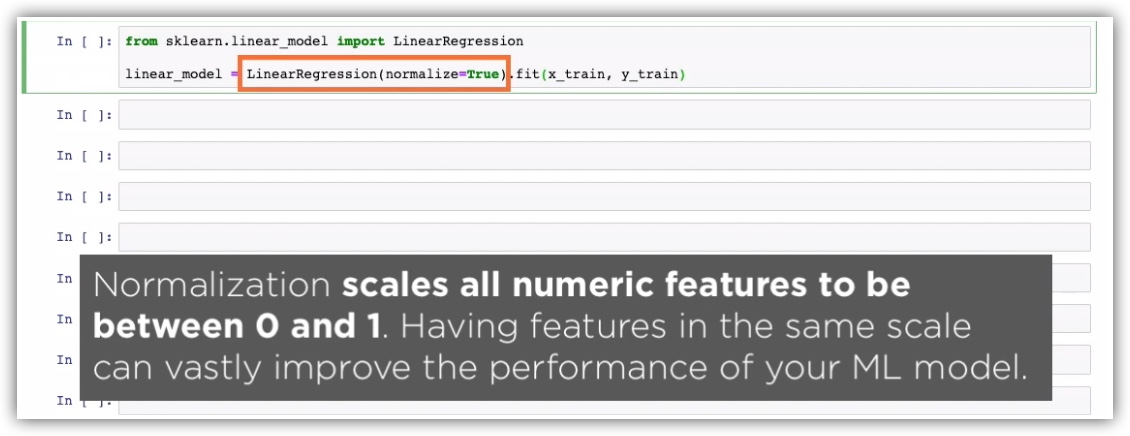

In [43]:
'''
Scikit-learn offers us high-level estimator objects that we can use to build and train our machine learning model.

In order to perform linear regression, we'll use the LinearRegression estimator object.

Import this object and let's instantiate a linear model. 
'''

from sklearn.linear_model import LinearRegression
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-16_21-13-03.jpg')



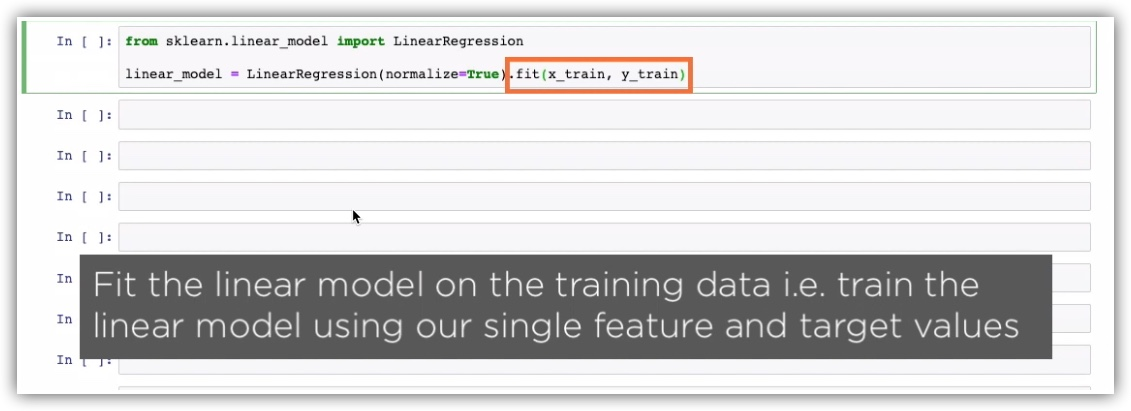

In [44]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-16_21-16-23.jpg')

In [45]:
'''
The features that you feed into your machine learning model are numeric and typically when you're working with 
numbers, your ML model performs far better if you normalize your data. 

If you pass in the parameter normalize is equal to True to your LinearRegression estimator object, 
this will scale all your numeric features to be between 0 and 1.

For a simple model, such as the ones that we'll build in this particular course, 
you'll find that normalizing your dataset may or may not make a difference, 
but for more complex models in the real world, normalizing your numeric data is a standard preprocessing 
technique for machine learning.

The fit function on an estimator object is what you call to train your machine learning model. 

This fits the linear model on the training data, so it trains the linear model using our single feature, 
the horsepower, and it uses the target values to adjust the model parameters. 


'''
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

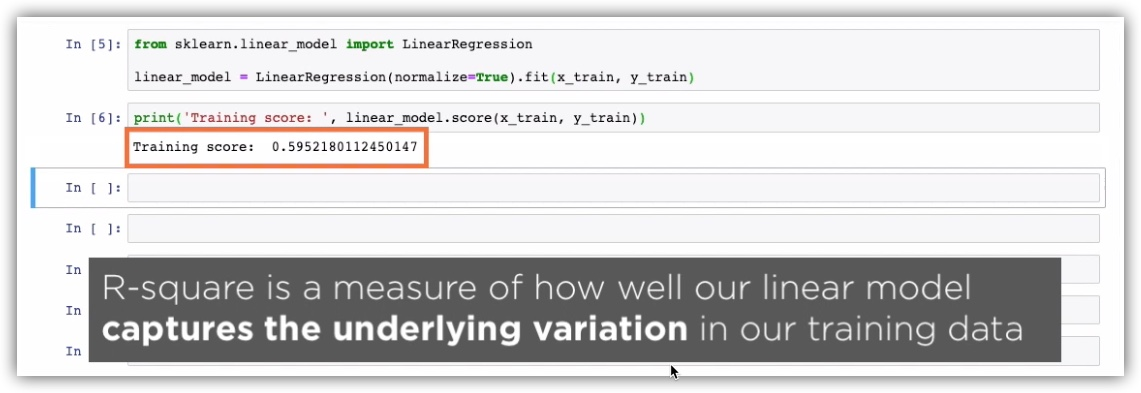

In [46]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-16_21-22-19.jpg')

In [47]:
'''
A way to measure how well your model has performed on the training data is to score your model using the 
R squared score. 

The score function on your linear regression model will return the R square value for your training data.

As we discussed, this R square value is a measure of how well our linear model captures the underlying 
variation in our training data. 

And you can see here that with just a single feature, horsepower, our model has an R square of 60%. 
It isn't great, but it isn't terrible either.

'''
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.6040260228388256


In [48]:
'''
Now that we have a fully trained model built using a single feature, let's use this model for prediction.

Call linear_model.predict and pass in our test data, as in only X values are the features to predict. 
And here are our predictions, saved in y_pred.
'''
y_pred=linear_model.predict(x_test)


In [49]:
'''
A way to objectively measure how well your linear model performed on instances it 
hasn't seen before is to calculate the R square score on your test data. 

The sklearn.metrics namespace offers a number of useful metrics to use with your ML models. 

Import the r2_score function here from the sklearn.metrics namespace, and use that to score how your 
model performed on the test data. 

Pass in the predicted values from your model, and compare them with the actual values in your test data.
'''

from sklearn.metrics import r2_score
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.6134703584934424


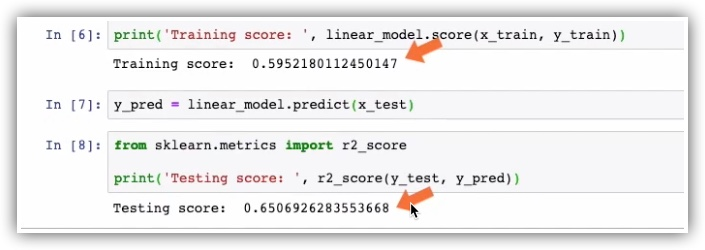

In [50]:
'''
And with just one feature, our linear regression model has an R squared score of 60%. 

Compare that with the R square score of the training data. 
The R square on test data is better than on training data, which means that our model is a good, robust model, 
not overfitted on the training data. 

An overfitted model is one that does well on the training data, but does poorly when used for prediction or on 
test data.

'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-16_21-29-24.jpg')

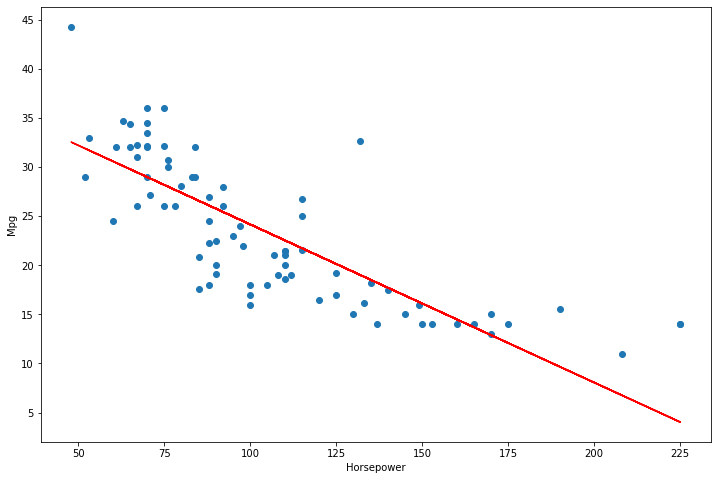

In [51]:
'''
Let's use a little visualization to see how well our linear model fits on the underlying data. 

I'll first plot a scatterplot of horsepower versus miles per gallon. 
This scatterplot represents the test dataset and the actual Y values. 

I'll then plot a line representing the horsepower and predictions from our linear model in the red color. 

And here is what the resulting visualization looks like. 

The scatterplot represents the test data, the red line represents the predicted values from our model. 
This is our linear model.
'''

fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Horsepower')
plt.ylabel('Mpg')
plt.show()

In [52]:
'''
Let's build one more linear model. 
The feature that we'll use this time to train our model is the age of the car. 

The features from our X variables and our Y values are the target, what we want to predict, miles per gallon. 

Split our dataset into training and test data, initialize a LinearRegression estimator object, 
make sure you normalize your numeric features, and call fit on the training data. 

Once we have a fully trained linear regression model, print out the R square score for this model on the 
training data, use this model for prediction on the test data, and print out the R square score on the 
test data as well. 

And here is how the two scores compare when we use age as our feature. 
The training R square score is 36%, and the test score is 19%, so this is a pretty poor model.
'''
X=automobile_df[['age']]
Y=automobile_df['mpg']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)
print('Training score: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.36112880608556863
Testing score:  0.19827232820453733


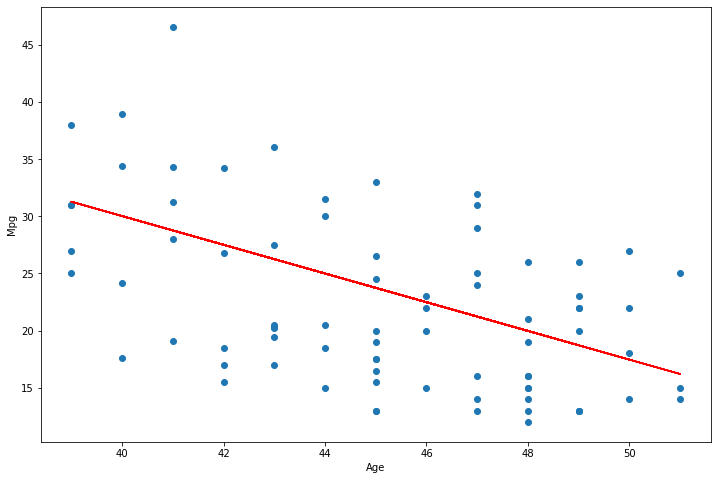

In [53]:
'''
So, age by itself is not really a good predictor for the car's mileage, and this will be born out using our 
visualization as well. 

Plot a scatter plot of X versus actual Y and X versus Y predicted, and here is what the result looks like. 
You can see that the line that we've drawn here really doesn't capture the underlying variation in the data well, 
which is why this model has a low R square score. 

The points are too scattered, too far apart, the line really doesn't represent them well.

'''

fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Age')
plt.ylabel('Mpg')
plt.show()

In [54]:
'''
This time, instead of using a single feature to train our model, we'll use more than one feature.
 Create our X variables that we'll use to train our model using displacement, horsepower, and weight.
 We'll use these three features to predict the miles per gallon for the cars in our dataset.
 MPG is our Y variable assigned to the Y data frame.
'''

X=automobile_df[['displacement','horsepower','weight']]
Y=automobile_df['mpg']

In [55]:
'''
With our data all set up, let's call the train_test_split function to split into training data that we'll use to build our model,
and test data that we'll use to measure our model.
'''
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [56]:
'''
 We'll continue to work with the LinearRegression estimator object, and we'll normalize all of the numeric features
 that we pass in to train our model.

 Call the fit function on your estimator object to start the training process, and pass in the training
 data and the corresponding training Y values.
'''
linear_model=LinearRegression(normalize=True).fit(x_train,y_train)

In [58]:
'''
 Once the model has completed training, call the linear_model.score function to calculate the R square score on the training data.
 You can see from this R square score here that the additional features that we've used to train our model have real predictive power.
 Our R square has improved, it's now 71 %.
 Earlier when we used just a single feature, horsepower, our R square was around 59% on the training data, so this is a definite improvement.
'''

print("Training Score : ", linear_model.score(x_train,y_train))

Training Score :  0.7170149678642119


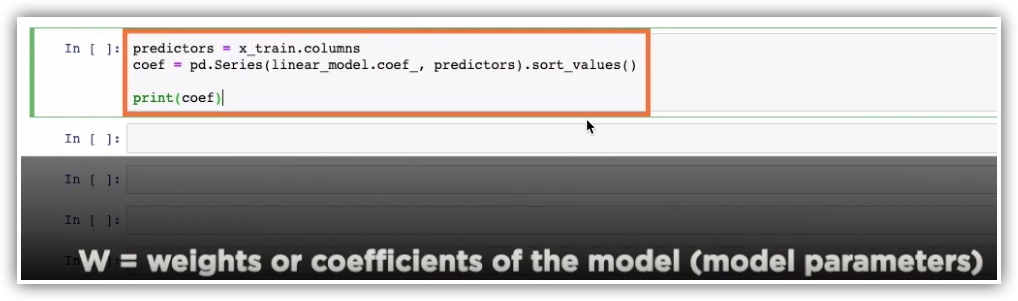

In [59]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-17_11-17-07.jpg')
'''
 A linear model assumes a linear relationship between your input features and the output that
 you're trying to predict, and this linear relationship can be represented as Y is equal to WX + B,
 where W is the weight, or the coefficients that you use to multiply your X variables, the features.

 W is also referred to as the model weight or model parameters.
'''

In [62]:
'''

 You can use the linear model instance in order to get the coefficients for your X variables or the predictors.

 Get the predictors from your x_train data frame, these are the columns of your data frame,
 and we'll instantiate a pandas series with a coefficient for each predictor.

 And let's print out these coefficients and see what they are.

 The coefficients of your linear model for horsepower, displacement, and weight are all negative.

 This indicates that as the values for these features increase, the mileage of the car tends to go down.
'''

predictors=x_train.columns
coef=pd.Series(linear_model.coef_,predictors).sort_values()
coef

horsepower     -0.031554
displacement   -0.008993
weight         -0.005457
dtype: float64

In [63]:
'''
The R square on the training data for this model with additional features was much better.
Let's use this model for prediction and store the predicted values in y_pred.
'''
y_pred=linear_model.predict(x_test)

In [64]:
'''
Let's now calculate the R square score for the test data.
And you can see that there is a significant improvement here as well.

The R square score on test data is almost 76%. Once again, the R square calculated on test data is better than the
R square on training data, indicating that it's a robust model.

The overall higher R square that we get with three features instead of one means that this model has better predictive power.
'''
print("Testing Score : ", r2_score(y_test,y_pred))

Testing Score :  0.6562725029103171


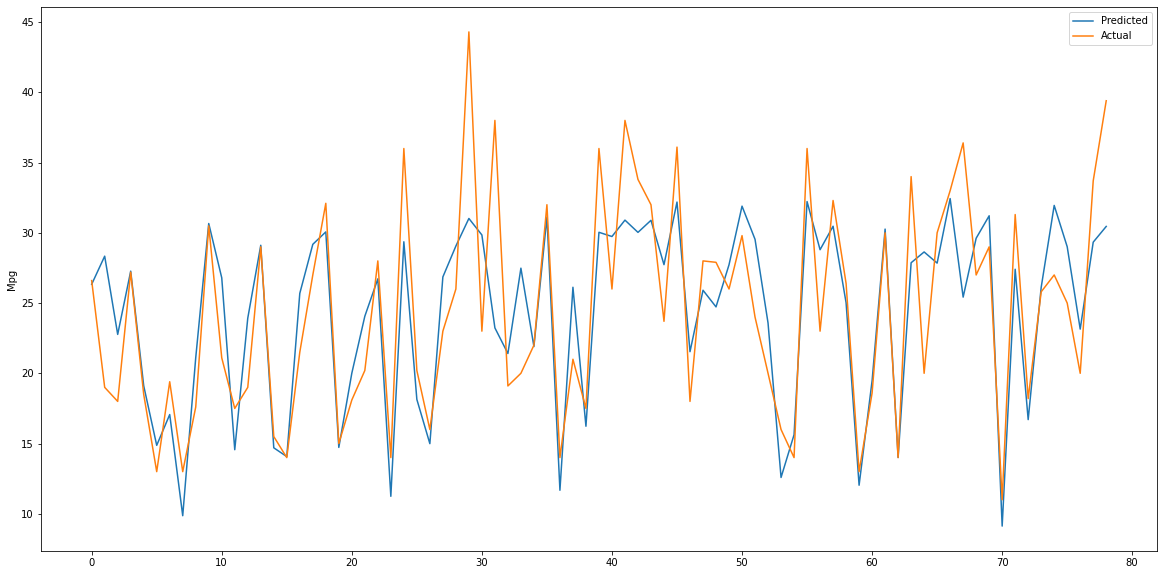

In [65]:
'''
It's always fun to visualize our results. Let's plot the predicted values versus actual values from our dataset using a line chart,
and see how closely they track one another.
And here's what the result looks like. The values predicted by our model are in blue, and actual values are in orange.
You can see that these two lines track each other pretty closely.
'''

plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('Mpg')

plt.legend()
plt.show()

In [67]:
'''
    Well, we added more features, we got a better model.
    What if we add even more features? Displacement, horsepower, and weight are the features that we're using currently.

    I'm going to include acceleration, as well as the number of cylinders.
    For now, I'm going to go over these five features to train our machine learning model.
    We'll instantiate a new LinearRegression estimator object and fit on this new training data.
    Once this new model has been trained, let's calculate its R squared.

    Let's see what kind of a model it is. Now, the original R square that we got earlier with three features was around 69%.
    Hit Shift+Enter to calculate the new R squared, and you might say wow, it's 73%, this is definitely a better model.

    Use the linear model to predict on our x_test dataset, save the predictions in y_pred, and let's calculate the r2_score for our test data.

    The R square on test data is 60.9 %, almost as low as the R square that we got when we trained a model using just a single feature, the horsepower.

    So a lesson learned here. More features do not necessarily make a better model.

    What we just performed is what is sometimes called kitchen sink regression where we throw all of the features that we have into our model.
    Kitchen sink regression does not necessarily perform well because all of our model features may not have good predictive power.
'''


X=automobile_df[['displacement','horsepower','weight','acceleration','cylinders']]
Y=automobile_df['mpg']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
linear_model=LinearRegression(normalize=True).fit(x_train,y_train)
print("Training Score : ", linear_model.score(x_train,y_train))
y_pred=linear_model.predict(x_test)
print("Testing Score : ", r2_score(y_test,y_pred))

Training Score :  0.713982761241602
Testing Score :  0.6721641982553026


In [68]:
'''
once again to get the coefficients of all of the features that we've included.
We get five coefficients corresponding to the five features that we used to train our model.
'''
predictors=x_train.columns
coef=pd.Series(linear_model.coef_,predictors).sort_values()
coef

cylinders      -0.350272
horsepower     -0.038871
displacement   -0.007406
weight         -0.004643
acceleration    0.041235
dtype: float64

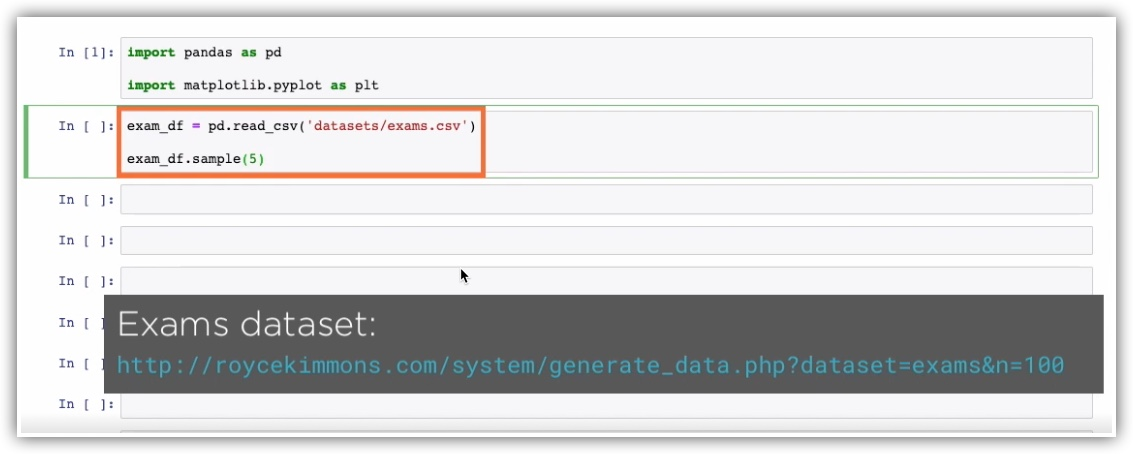

In [71]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-17_18-02-56.jpg')

In [133]:
'''
 This is a dataset that contains categorical values, and we'll see how we can convert these to
 numeric form so that we can use them to train our machine learning model.

 That's the dataset we're going to use, exam scores dataset.

 We know the gender of the student, the race or ethnicity he or she belongs to, the parental level of education,
 whether the student has standard or subsidized lunch, and whether the student has joined a test preparation course.

 You can see that these personal details are categorical, or discrete values.
 They're not numeric either, they're represented as string values in our dataset.

 We also have a few features describing the scores for that student in math, reading, as well as writing.
 All of these scores are out of a hundred. These are the only numeric features in our dataset with continuous values.
'''
exam_df=pd.read_csv('data/exams.csv')
exam_df.sample(5)

gender race/ethnicity parental level of education         lunch  \
99    male        group B           bachelor's degree      standard   
78  female        group C            some high school      standard   
19    male        group E                some college      standard   
47    male        group E                some college  free/reduced   
68  female        group B                some college      standard   

   test preparation course  math score  reading score  writing score  
99                    none          77             69             67  
78                    none          87             87             85  
19                    none          75             66             64  
47               completed          96             94             90  
68               completed          44             57             53

In [134]:
'''
The describe function on a pandas DataFrame will give us brief statistics about all of the numeric values in our data frame.
This dataset has a total of 100 records for 100 students.
You can see the average scores for these students in math, reading, and writing.
You can see that math scores are a little lower than their reading and writing scores.
The standard deviation of these scores, how these scores vary across students, is also different.
'''
exam_df.describe()

math score  reading score  writing score
count  100.000000     100.000000     100.000000
mean    66.730000      69.980000      69.140000
std     15.631395      13.732642      14.886792
min     18.000000      25.000000      20.000000
25%     58.000000      61.000000      62.000000
50%     69.000000      71.500000      69.000000
75%     78.250000      80.000000      81.000000
max     96.000000      94.000000      93.000000

In [135]:
'''
This dataset is interesting because the data needs a lot of preprocessing before we can feed it into a linear model.
And scikit-learn makes it very easy for you to preprocess data using the preprocessing module from sklearn.
Go ahead and import preprocessing.
We're going to use the preprocessing.scale function to standardize all of the scores in our dataset.

Standardizing a dataset means that these column values will now have 0 mean and unit variance. We'll have a variance of 1.

Standardizing values is extremely useful because it gives you an easy way to compare values which are part of different distributions.
Standardization is also a common preprocessing technique for machine learning algorithms to build more robust models.
We call preprocessing.scale to standardize the math score, reading score, and writing score of all of our students.

Standardization is done by subtracting the mean, or average, value of a column of values from each value in that column and dividing the number by the standard deviation of the column.
'''

from sklearn import preprocessing
exam_df[['math score']]=preprocessing.scale(exam_df[['math score']]).astype('float64')
exam_df[['reading score']]=preprocessing.scale(exam_df[['reading score']]).astype('float64')
exam_df[['writing score']]=preprocessing.scale(exam_df[['writing score']]).astype('float64')

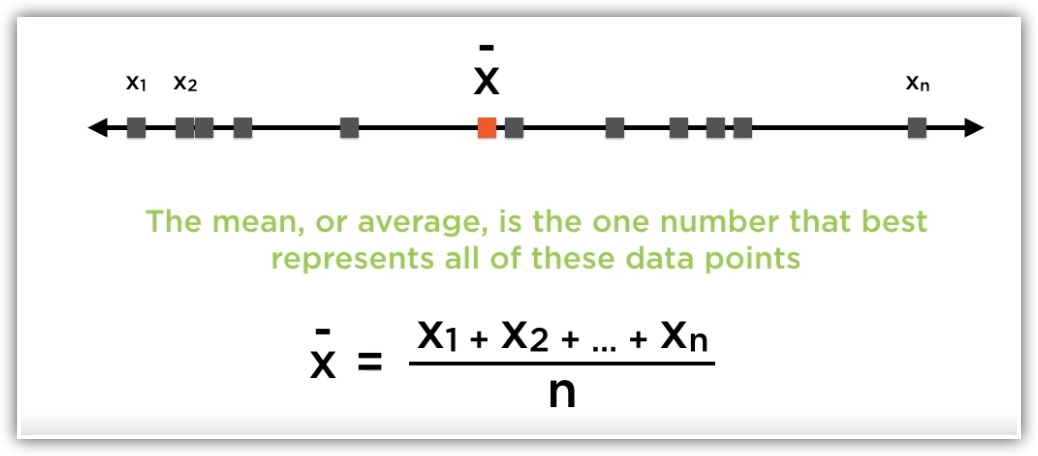

In [136]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-17_18-19-03.jpg')

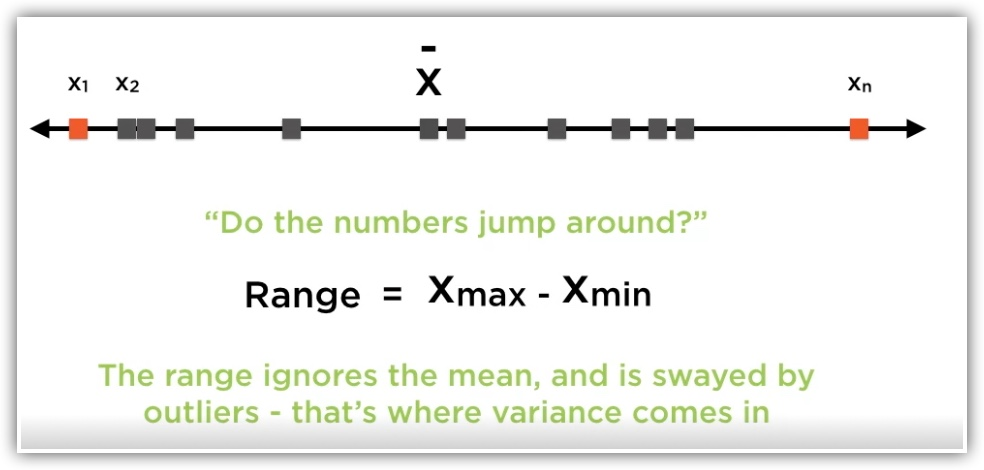

In [137]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-17_18-19-58.jpg')

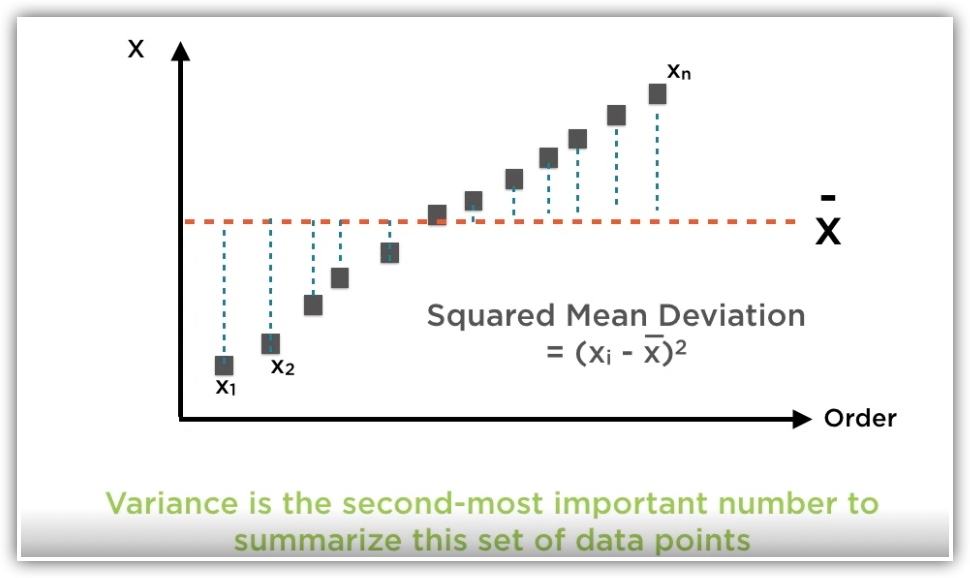

In [138]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-17_18-20-48.jpg')

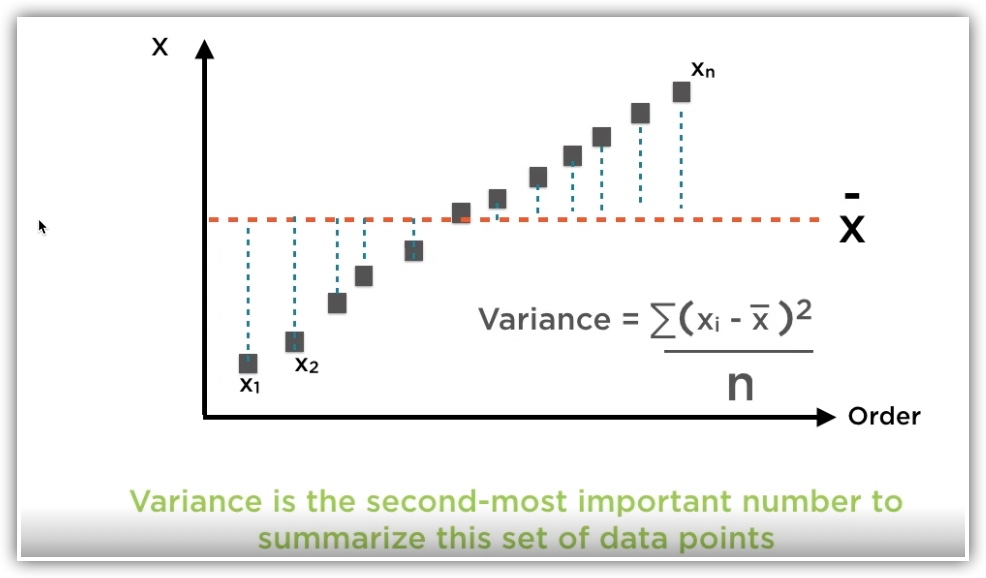

In [139]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-17_18-21-32.jpg')

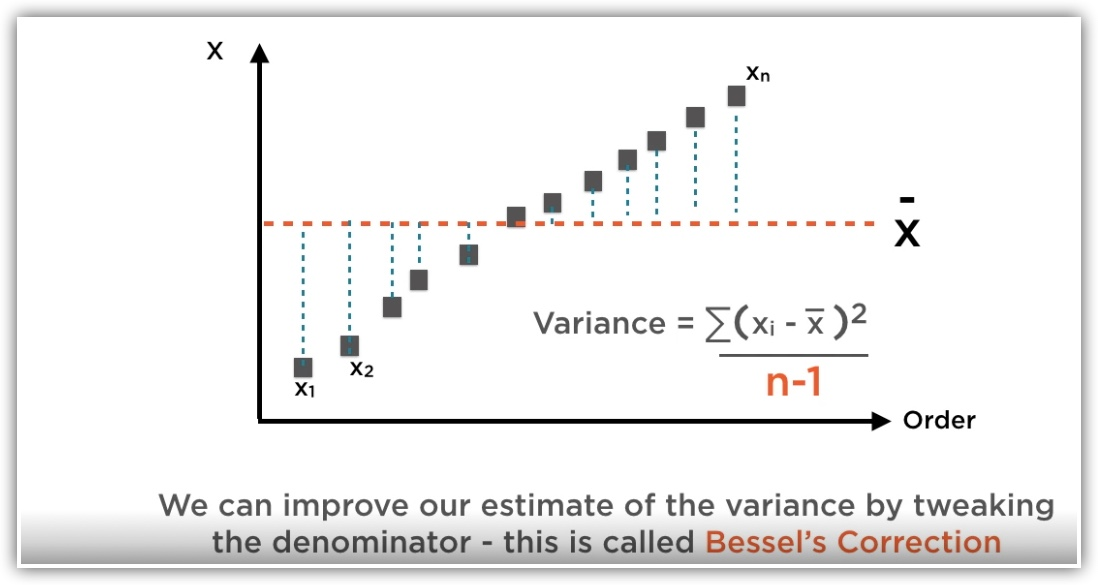

In [140]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-17_18-22-14.jpg')

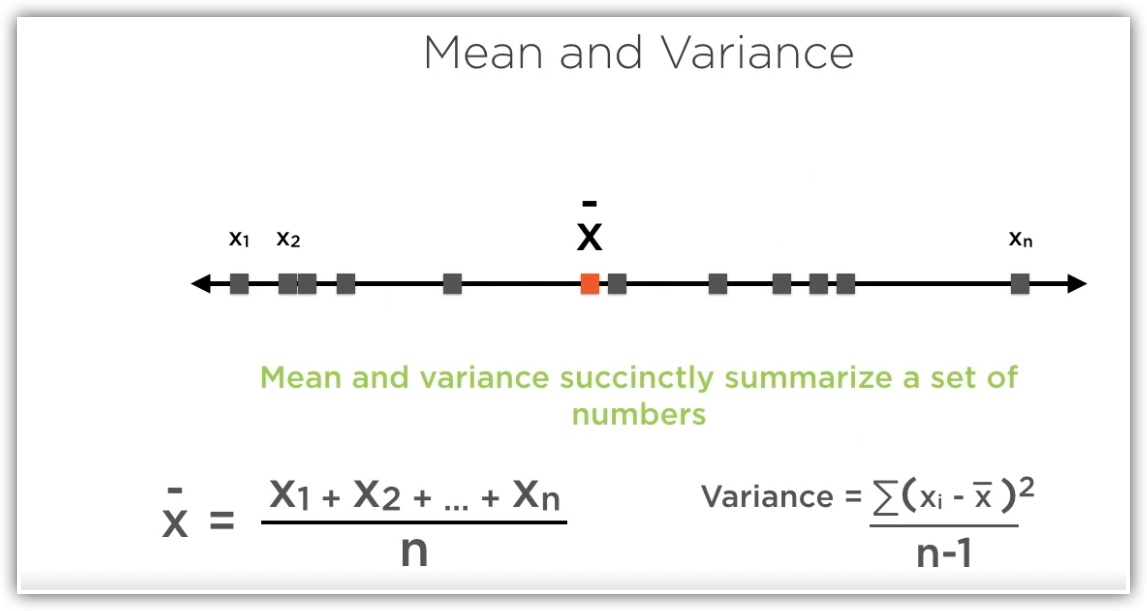

In [141]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-17_18-22-46.jpg')

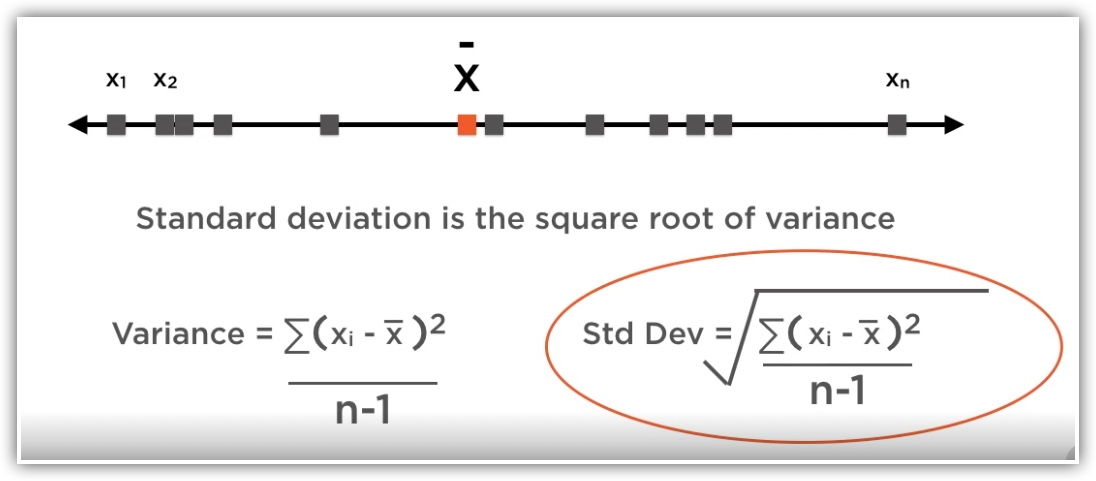

In [142]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-17_18-23-21.jpg')

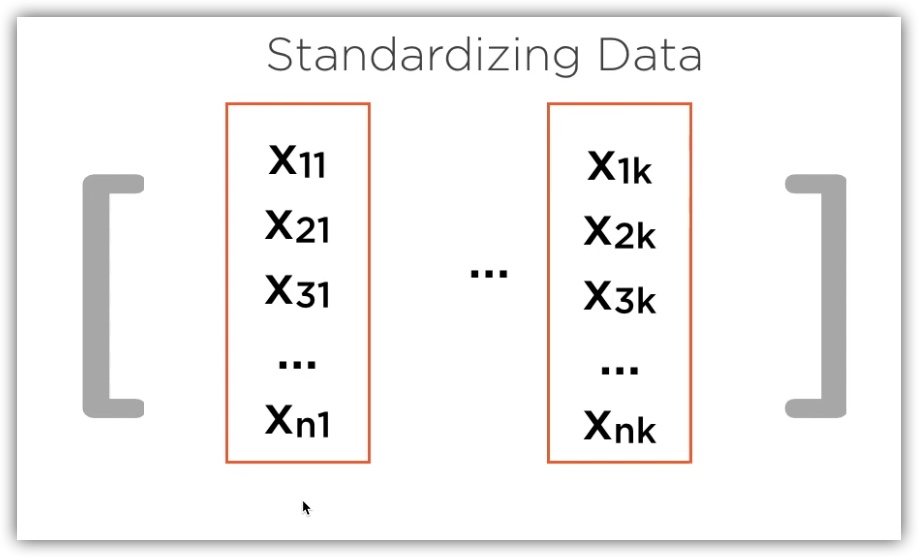

In [143]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-17_18-23-59.jpg')

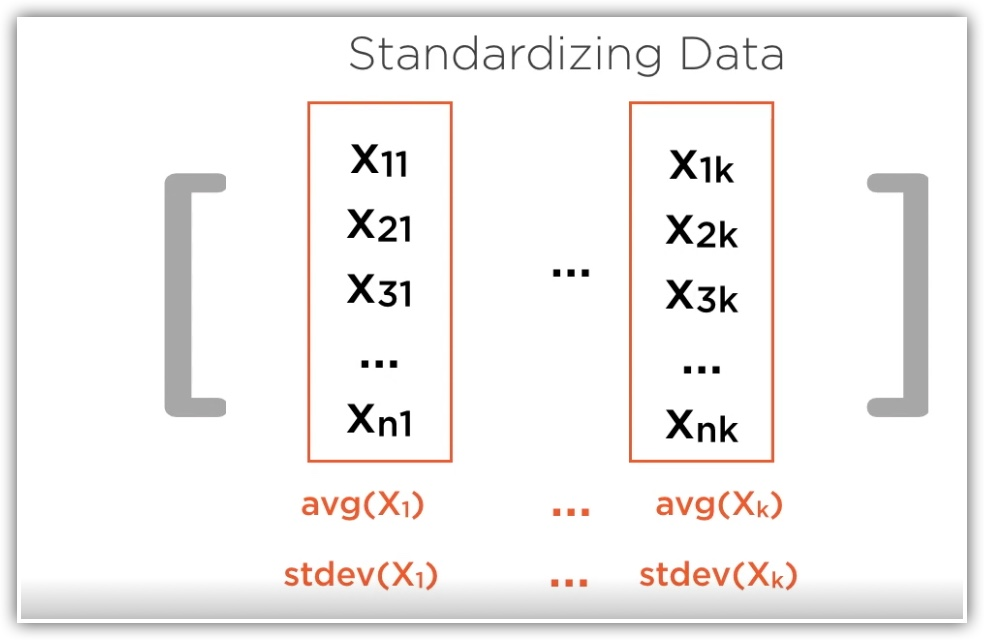

In [144]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-17_18-24-34.jpg')

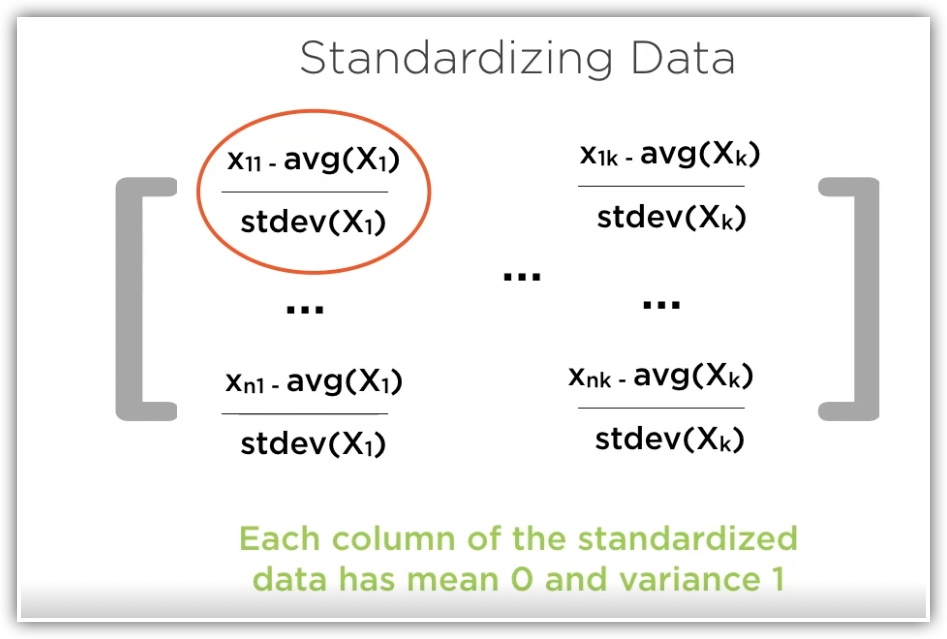

In [145]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-17_18-25-14.jpg')

In [146]:
'''
If you sample your data frame now with the standardized values for the different scores,
you can see that the scores are now very small numbers. Negative scores are those which are below the mean,
and positive scores are those that are above the mean.

Standardizing a dataset allows you to see this at a single glance. You don't need to know the actual numbers, actual mean values, nothing.

You can see that this particular student has been doing pretty poorly in her exams. All of her scores are more than one standard deviation below the mean.
'''
exam_df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group E          associate's degree      standard   
1  female        group C                some college      standard   
2    male        group E                 high school      standard   
3  female        group B                some college  free/reduced   
4  female        group B           bachelor's degree      standard   

  test preparation course  math score  reading score  writing score  
0                    none    0.210248       0.440580      -0.009452  
1                    none   -1.268562      -1.315885      -1.292181  
2                    none    0.531729       0.147836      -0.076964  
3               completed   -1.461450      -1.315885      -1.022132  
4               completed    0.017360       0.440580       0.733181

In [147]:
'''
Let's call describe on our data frame once again. Our data frame now contains standardized values for scores.
You can see that mean values are very, very close to 0, and the standard deviations for all three scores are very, very close to 1.
This is what standardization has done.
'''
exam_df.describe()

math score  reading score  writing score
count  1.000000e+02   1.000000e+02   1.000000e+02
mean  -2.642331e-16  -3.048950e-16  -4.468648e-17
std    1.005038e+00   1.005038e+00   1.005038e+00
min   -3.133149e+00  -3.291909e+00  -3.317542e+00
25%   -5.613050e-01  -6.572107e-01  -4.820360e-01
50%    1.459522e-01   1.112428e-01  -9.451687e-03
75%    7.406911e-01   7.333242e-01   8.006929e-01
max    1.881947e+00   1.757929e+00   1.610838e+00

In [148]:
'''
What's interesting about this dataset is the fact that many of its columns contain discrete or categorical values,
such as the parental level of education column.

Call the unique function in order to see the unique values represented in this column.

These are the differing levels of education for the parents of these students.
All of the students belong to the same grade.


'''
exam_df['parental level of education'].unique()

array(["associate's degree", 'some college', 'high school',
       "bachelor's degree", 'some high school', "master's degree"],
      dtype=object)

In [149]:
'''
For this particular field containing categorical data, you know that there is an intrinsic order in the level of education.
Some high school, then comes high school, then some college, then associate's, the bachelor's, then master's degree.



'''
parent_level_of_education = [
    "some high school",
    "high school",
    "some college",
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

In [150]:
'''
Categorical values have to be converted to numeric form before they can be used in your ML model,
and when there is an ordering associated with your categories, you should use the preprocessing.LabelEncoder object
in scikit-learn to convert categorical values to integer values to use in our ML algorithm.


Instantiate the LabelEncoder object, and call fit on the parent_level_of_education array.
The result will be an ordered label encoding of these categories. Every category will be represented by an integer value.
And these integers can then be fed into our ML model for training.

'''
label_encoding=preprocessing.LabelEncoder()
label_encoding=label_encoding.fit(parent_level_of_education)

In [151]:
'''
 Let's transform our parental level of education column in our data frame to these unique integer labels by calling label_encoding.transform.
 Our parental level of education column will now contain integer values representing the different levels of education.
 Zero represents some high school, 1 represents high school, and so on.

'''

exam_df['parental level of education']=label_encoding.transform(exam_df['parental level of education'].astype(str))
exam_df.head()

gender race/ethnicity  parental level of education         lunch  \
0  female        group E                            0      standard   
1  female        group C                            4      standard   
2    male        group E                            2      standard   
3  female        group B                            4  free/reduced   
4  female        group B                            1      standard   

  test preparation course  math score  reading score  writing score  
0                    none    0.210248       0.440580      -0.009452  
1                    none   -1.268562      -1.315885      -1.292181  
2                    none    0.531729       0.147836      -0.076964  
3               completed   -1.461450      -1.315885      -1.022132  
4               completed    0.017360       0.440580       0.733181

In [152]:
'''
Label_encoding.classes_ gives you the classes that were encoded as integers.
These are the various levels of education for the parents of students.
'''
label_encoding.classes_

array(["associate's degree", "bachelor's degree", 'high school',
       "master's degree", 'some college', 'some high school'],
      dtype='<U18')

In [153]:
'''
 If you have values in your dataset that are categorical in that they are discrete values,
 but there is no intrinsic ordering between these values,
 you can convert these categorical values to numeric representation using one-hot encoding.

 For example, the race or ethnicity that a particular student belongs to is just a category. There is no ordering between these races.

 The pd.get_dummies function will allow us to represent these categories for students in numeric form using one-hot encoding.
 The pd.get_dummies function will replace the original race/ethnicity column with a column representing each race.

 Race and ethnicity are represented by categories group A, group B, all the way up to group E.
 And you can see that there is a column associated with each of these groups after we've one-hot encoded this information.

  A student who belongs to group E will have a 1 in that particular column, all other columns will be 0s.
  A student belonging to group B will have a 1 in that column, other columns will be 0s.
  This is how one-hot encoding of categorical data works.
'''

exam_df=pd.get_dummies(exam_df,columns=['race/ethnicity'])
exam_df.head()

gender  parental level of education         lunch test preparation course  \
0  female                            0      standard                    none   
1  female                            4      standard                    none   
2    male                            2      standard                    none   
3  female                            4  free/reduced               completed   
4  female                            1      standard               completed   

   math score  reading score  writing score  race/ethnicity_group A  \
0    0.210248       0.440580      -0.009452                       0   
1   -1.268562      -1.315885      -1.292181                       0   
2    0.531729       0.147836      -0.076964                       0   
3   -1.461450      -1.315885      -1.022132                       0   
4    0.017360       0.440580       0.733181                       0   

   race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                       0                       0                       0   
1                       0                       1                       0   
2                       0                       0                       0   
3                       1                       0                       0   
4                       1                       0                       0   

   race/ethnicity_group E  
0                       1  
1                       0  
2                       1  
3                       0  
4                       0

In [154]:
'''
We'll now perform the same one-hot encoding for other categorical values in this dataset.
The columns for gender, lunch, and test preparation course.
I'll invoke pd.get_dummies on all of these columns.
And once we've done this, let's take a look at what the resulting data looks like.

You can see that this data has many more columns, as all of our categorical values have been one-hot encoded.
'''
exam_df=pd.get_dummies(exam_df,columns=['gender','lunch','test preparation course'])
exam_df.head()

parental level of education  math score  reading score  writing score  \
0                            0    0.210248       0.440580      -0.009452   
1                            4   -1.268562      -1.315885      -1.292181   
2                            2    0.531729       0.147836      -0.076964   
3                            4   -1.461450      -1.315885      -1.022132   
4                            1    0.017360       0.440580       0.733181   

   race/ethnicity_group A  race/ethnicity_group B  race/ethnicity_group C  \
0                       0                       0                       0   
1                       0                       0                       1   
2                       0                       0                       0   
3                       0                       1                       0   
4                       0                       1                       0   

   race/ethnicity_group D  race/ethnicity_group E  gender_female  gender_male  \
0                       0                       1              1            0   
1                       0                       0              1            0   
2                       0                       1              0            1   
3                       0                       0              1            0   
4                       0                       0              1            0   

   lunch_free/reduced  lunch_standard  test preparation course_completed  \
0                   0               1                                  0   
1                   0               1                                  0   
2                   0               1                                  0   
3                   1               0                                  1   
4                   0               1                                  1   

   test preparation course_none  
0                             1  
1                             1  
2                             1  
3                             0  
4                             0

In [155]:
'''

    Now that we have our data all in numeric form, including the categorical values, let's set up our training data and our test data.

    We'll try and predict the math score for a particular student using the other features in the dataset.

    So we'll use the personal details for every student, along with their reading and writing scores to predict their math scores.

    The x variables, or the features that we'll use for training, are all columns other than the math score.
    So drop the math score and assign the rest to x.

    The y variables are the target values that we're going to predict using linear regression is the math score for every student.

    Call the train_test_split function in order to use 80% of the data to train our model and 20% to test our model.



'''

from sklearn.model_selection import train_test_split
X=exam_df.drop('math score',axis=1)
Y=exam_df['math score']

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [158]:
'''
 This is a toy dataset. Our training data has just 80 records, and our test data has 20 records.
 And the corresponding thing is true for the y labels for the values as well.
'''
x_train.shape,x_test.shape

((80, 14), (20, 14))

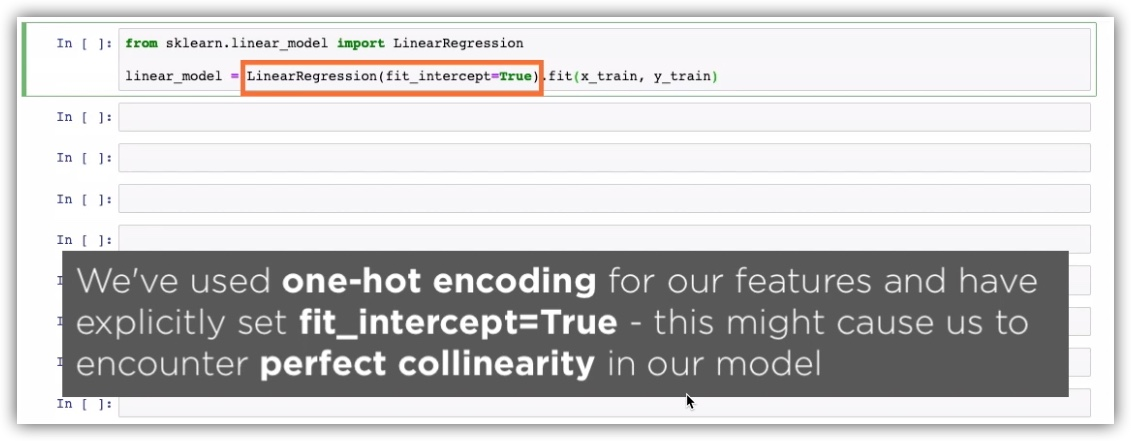

In [160]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-17_19-44-18.jpg')

In [161]:
'''
With our dataset all set up, we are now ready to fit a linear model on our data.
From kslearn.linear_model, import a LinearRegression estimator.
Instantiate the LinearRegression estimator object, and we explicitly pass in the parameter fit_intercept is equal to True.

Now we've used one-hot encoding for the features in our dataset, and we have set fit_intercept to True,
now this particular setup might cause us to encounter what is known as the dummy variable trap.

The dummy variable trap occurs when there is perfect collinearity between two variables that we've used in our model.
This trap is encountered if we fit an intercept on our linear model and we use all of the columns from our one-hot encoded variables.

'''
linear_model=LinearRegression(fit_intercept=True).fit(x_train,y_train)

In [162]:
'''
Let's try training our model with these particular parameters, fit_intercept=True and one-hot encoding with all of the
columns intact in our features, and see what happens.
The model trains with no errors, things seem to be fine here.
Let's calculate the score of this model. Here is the R square, and the R square is 88%.
This is very good. It's a simple dataset, which is why we have this high R squared.
'''
print("Training_score : " , linear_model.score(x_train, y_train))

Training_score :  0.8941812551608761


In [165]:
'''
 Let's use this model for prediction on our test data. Call linear_model.predict on x_test, and
 let's calculate the testing R square score as well. And the testing score is 85%. Once again, quite good.
'''
y_pred=linear_model.predict(x_test)

print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.835395527839539


In [167]:
'''
Let's now run the same model, the linear regression model, on the same data.
This time we'll set fit_intercept to False. When we've used all of the columns in our one-hot encoded labels, fit_intercept should be False.

Once the training of this model is complete, calculate the training score. You'll see that it's once again 88.8 %, the same as before.
Use this model for prediction and calculate the test R square on the test data as well.
Once again, it's 85%.

Now, if you've been following along closely, you might have realized that our training as well as test R squares with fit_intercept=True,
as well as False, are exactly the same.
Why is this?
'''

linear_model=LinearRegression(fit_intercept=True).fit(x_train,y_train)
y_pred=linear_model.predict(x_test)
print("Training_score : " , linear_model.score(x_train, y_train)),print("Testing_score : ", r2_score(y_test, y_pred))

Training_score :  0.8941812551608761
Testing_score :  0.835395527839539


(None, None)

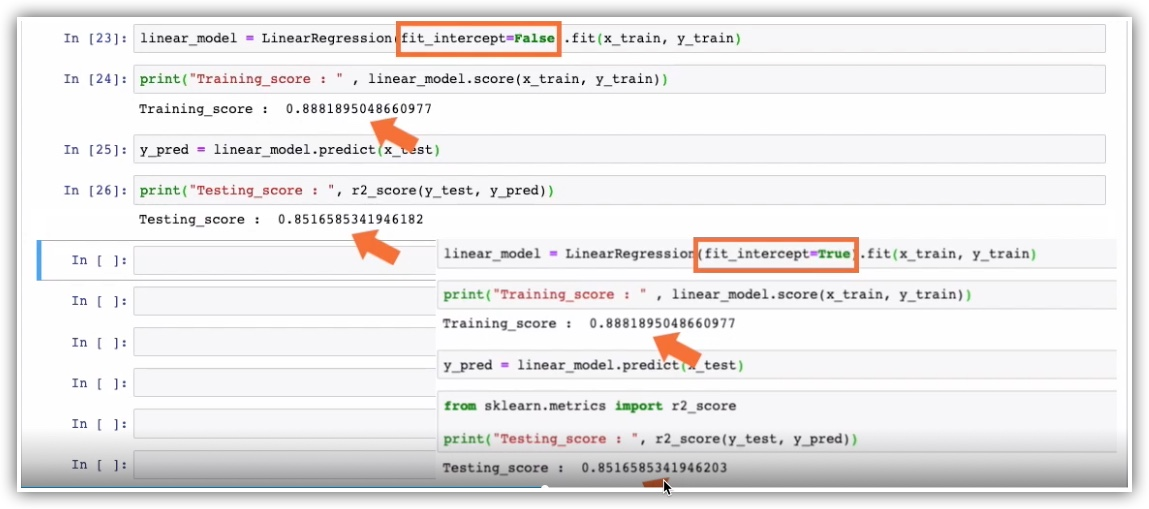

In [168]:
'''
So when we previously had set fit_intercept to True, we said that we might encounter the dummy variable trap. But that is clearly not the case.

With fit_intercept=False, we get the same results as with fit_intercept=True.
This dummy variable trap is often encountered in the real world, which is why the scikit-learn LinearRegressor estimator
object accounts for this intercept when you use one-hot encoding in your features.

So whether you set fit_intercept to True or False, it does not matter with the LinearRegression estimator object.

If you've used one-hot encoding for your features, the LinearRegression object will make sure that fit_intercept is False
under the hood so that you don't fall into the dummy variable trap.

So this is a good thing when you're using scikit-learn's LinearRegression object. Not all of the estimator objects in scikit-learn account for this though, so you have to watch out and be a little careful.
'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-17_19-53-47.jpg')

In [169]:
'''
Now that we have predicted values from our model, let's set up a data frame with the actual versus
 predicted values and take a look at some actual predictions.

 Because we standardized the scores when we fed them into our model, the output scores are also in the standardized form.

 The actual and the predicted scores seem to be pretty close. The high R square should tell us that this is a good model.
'''
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})

df_pred_actual.head(10)

predicted    actual
29  -0.302549 -0.561305
80   0.257924  0.210248
3   -1.467466 -1.461450
4    0.299005  0.017360
55   0.430859  1.110394
53   0.598642  1.238986
26   0.820431  0.788913
25  -1.993322 -2.425892
37  -1.000414 -0.625601
48   1.536482  1.817651

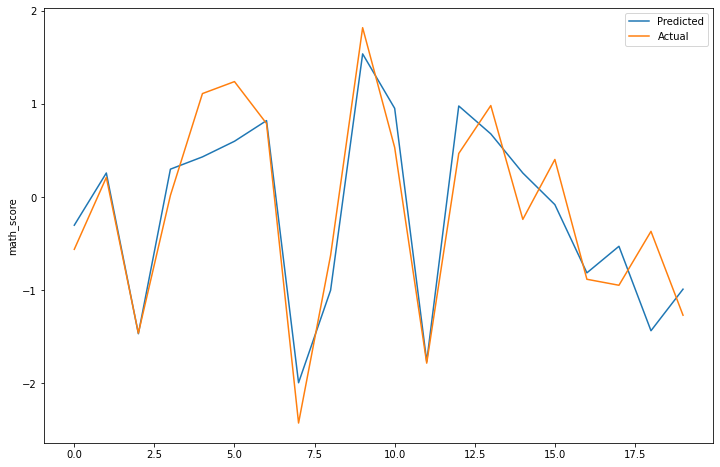

In [170]:
'''
Let's plot line charts of actual versus predicted scores. You can see that they're very close together.
'''
plt.figure(figsize = (12, 8))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('math_score')

plt.legend()
plt.show()

In [171]:

'''
Let's try predicting the math score for each student without using any of the other scores.
The only thing that we change here are our x variables. Drop the math score, writing score, and reading score from x.

We'll only use the student's personal details to predict his or her math score.
Split up the data into training and test, instantiate and train a linear regression model, calculate the R square score for training,
as well as test data.

And you can see that for this particular model our R-square values are really low.
That's because it is the other scores that have higher predictive power for the math scores.
'''
X = exam_df.drop(['math score', 'writing score', 'reading score'], axis=1)
Y = exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)
print("Training_score : " , linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)
print("Testing_score : ", r2_score(y_test, y_pred))

Training_score :  0.31752669023386504
Testing_score :  0.22720145812546266


In [172]:
'''
 Let's try this once again with a little variation.
 We'll try and predict the math score using only the reading score along with other features.
 We won't use the writing score. So reading score alone.

 Drop the math score and the writing score from our x variables, and go ahead, split up the data, train the model, and print out the R squares.
 And you can see that on this simple toy dataset, our R square values for training, as well as test, are pretty high
 when we use just the reading scores along with other features to predict the math score for a student.
'''

X = exam_df.drop(['math score', 'writing score'], axis=1)
Y = exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)
print("Training_score : " , linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)
print("Testing_score : ", r2_score(y_test, y_pred))

Training_score :  0.8379191719764331
Testing_score :  0.8456087581686662
